In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/final_fashion_dataset (2).csv')
df.head()

user_id     id  gender masterCategory subCategory articleType baseColour  \
0    93810   8493   Women        Apparel  Bottomwear      Skirts      Black   
1    24592  30757     Men        Apparel     Topwear      Kurtas       Grey   
2    13278  14881   Women    Accessories        Bags    Handbags      Black   
3    46048  48449     Men        Apparel     Topwear     Tshirts       Blue   
4    42098   4697  Unisex    Accessories     Watches     Watches      Black   

   season    year   usage                                 productDisplayName  \
0    Fall  2011.0  Casual                     Forever New Women Black Skirts   
1  Summer  2012.0  Ethnic                 Fabindia Men Grey Mangalgiri Kurta   
2  Summer  2011.0  Casual  United Colors of Benetton Women Solid Black Ha...   
3  Summer  2012.0  Casual                 French Connection Men Blue T-shirt   
4  Winter  2016.0  Sports           ADIDAS Unisex Digital Duramo Black Watch   

    filename                                               link  ratings  \
0   8493.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
1  30757.jpg  http://assets.myntassets.com/v1/images/style/p...        4   
2  14881.jpg  http://assets.myntassets.com/v1/images/style/p...        3   
3  48449.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
4   4697.jpg  http://assets.myntassets.com/v1/images/style/p...        4   

                                              review      Month  Price (USD)  
0  Amazing quality! Definitely recommend. Would r...   November           46  
1              Perfect for any occasion, great buy..  September           29  
2                       It's okay, nothing special.!    October           39  
3  Comfortable and stylish, worth the price. and ...     August           39  
4              Perfect for any occasion, great buy.!      March           33

In [4]:
df.shape

(36484, 17)

<h3>handling missing values</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [6]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [7]:
df.usage.value_counts()

usage
Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: count, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

user_id            id          year       ratings   Price (USD)
count  36484.000000  36484.000000  36484.000000  36484.000000  36484.000000
mean   55673.109336  27860.189124   2012.461737      3.600839     33.828610
std    25987.221109  16562.799723      1.860980      1.279767     11.320579
min    10022.000000   1163.000000   2007.000000      1.000000     10.000000
25%    32865.000000  13247.000000   2011.000000      3.000000     25.000000
50%    55706.000000  26471.500000   2012.000000      4.000000     34.000000
75%    78386.000000  41718.250000   2012.000000      5.000000     42.000000
max    99995.000000  60000.000000   2018.000000      5.000000     66.000000

In [10]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [11]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [12]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [13]:
df_unique = pd.DataFrame(dict_unique)
df_unique

numerical_columns  unique_values
0                id          36484
1              year             12
2           ratings              5
3       Price (USD)             57

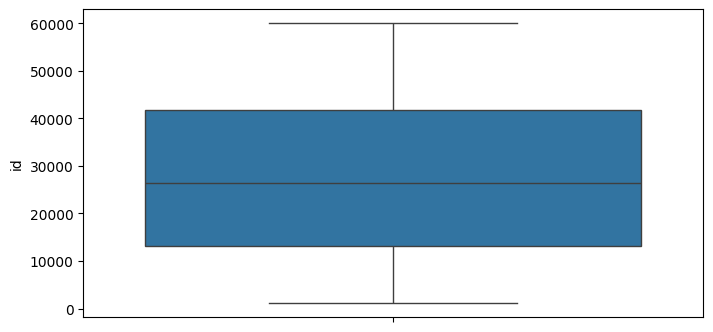

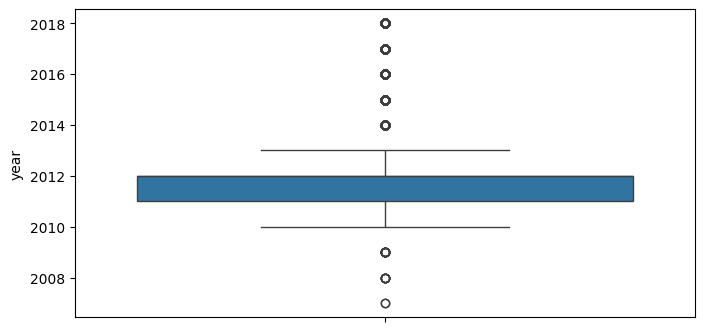

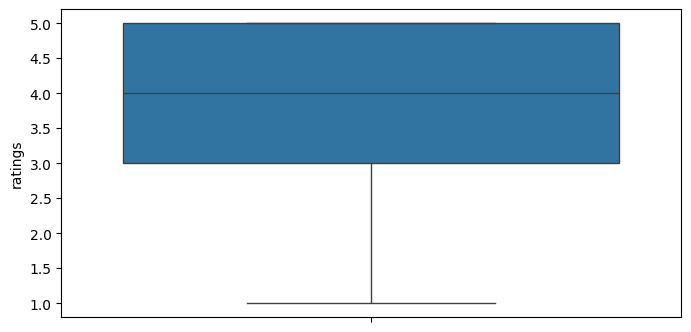

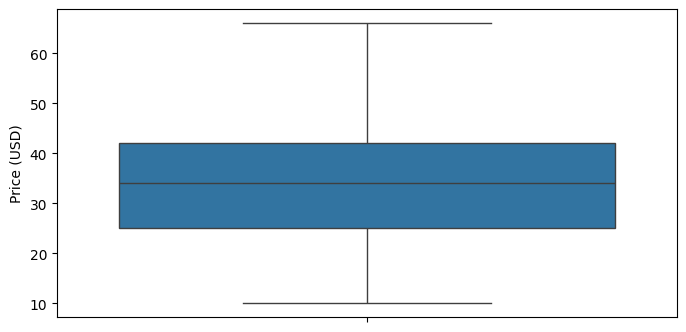

In [14]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

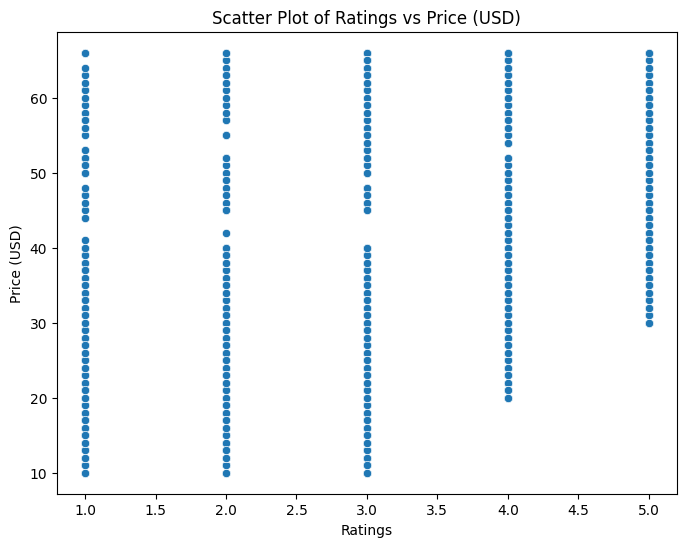

In [15]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [16]:
q25,q75 = np.percentile(df["year"],[25,75])

In [17]:
iqr = q75 - q25
iqr

1.0

In [18]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(2009.5, 2013.4)

In [19]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [20]:
df

user_id     id  gender masterCategory subCategory   articleType  \
0        93810   8493   Women        Apparel  Bottomwear        Skirts   
1        24592  30757     Men        Apparel     Topwear        Kurtas   
2        13278  14881   Women    Accessories        Bags      Handbags   
3        46048  48449     Men        Apparel     Topwear       Tshirts   
6        28289  12868     Men       Footwear       Shoes  Formal Shoes   
...        ...    ...     ...            ...         ...           ...   
36475    73318  54078     Men       Footwear       Shoes  Sports Shoes   
36476    18851  13183     Men       Footwear       Shoes  Sports Shoes   
36477    55457  10264     Men       Footwear       Shoes  Formal Shoes   
36479    40311  45378   Women       Footwear       Shoes         Flats   
36483    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
0          Black    Fall  2011.0  Casual   
1           Grey  Summer  2012.0  Ethnic   
2          Black  Summer  2011.0  Casual   
3           Blue  Summer  2012.0  Casual   
6          Black  Spring  2012.0  Formal   
...          ...     ...     ...     ...   
36475     Orange  Summer  2012.0  Sports   
36476      White    Fall  2011.0  Sports   
36477      Black  Summer  2013.0  Formal   
36479      Black  Summer  2012.0  Casual   
36483  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
0                         Forever New Women Black Skirts   8493.jpg   
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
6                      Lee Cooper Men Formal Black Shoes  12868.jpg   
...                                                  ...        ...   
36475    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
36476                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
36477    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
36479                          Rocia Women Black Sandals  45378.jpg   
36483  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
6      http://assets.myntassets.com/v1/images/style/p...        3   
...                                                  ...      ...   
36475  http://assets.myntassets.com/v1/images/style/p...        5   
36476  http://assets.myntassets.com/v1/images/style/p...        5   
36477  http://assets.myntassets.com/v1/images/style/p...        5   
36479  http://assets.myntassets.com/v1/images/style/p...        5   
36483  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
0      Amazing quality! Definitely recommend. Would r...   November   
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
6      Satisfactory for the price. for special occasi...     August   
...                                                  ...        ...   
36475  Exceeded expectations, love the fit! but could...  September   
36476  Perfect for any occasion, great buy. and I'm v...    January   
36477              Exceeded expectations, love the fit!.   November   
36479  High quality fabric, very satisfied. and I'm v...   November   
36483            Not as described, low-quality product.!   February   

       Price (USD)  
0               46  
1           

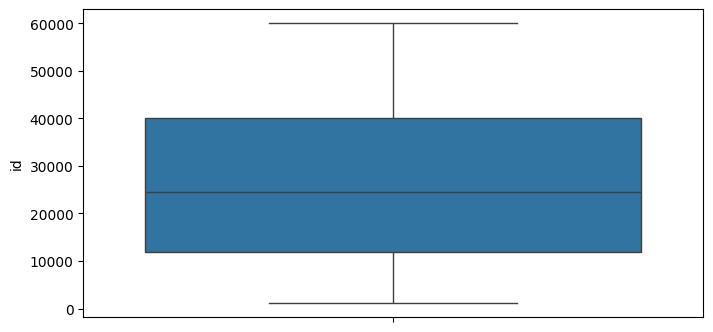

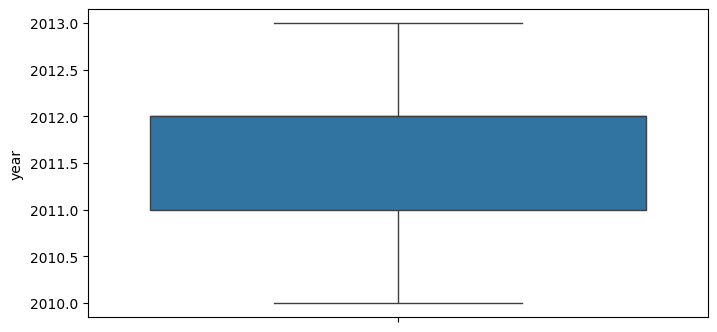

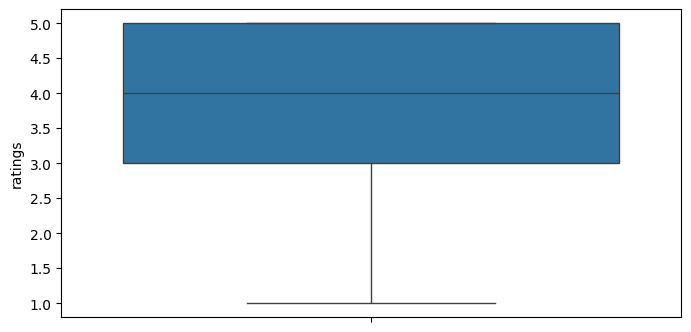

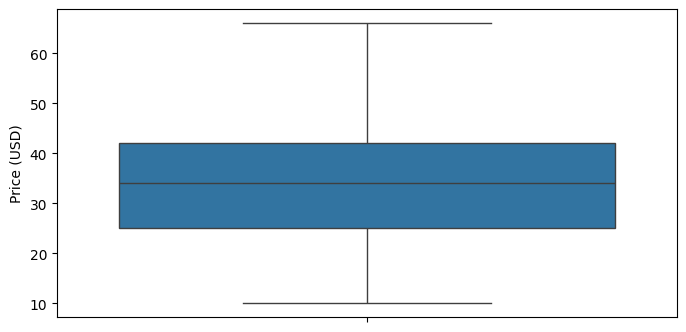

In [21]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

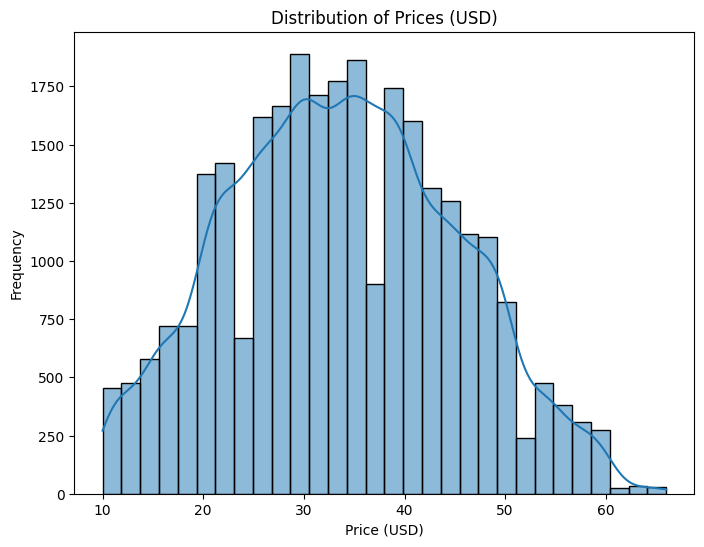

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


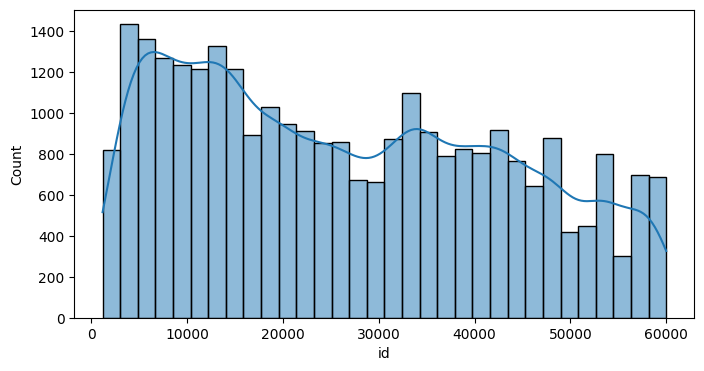

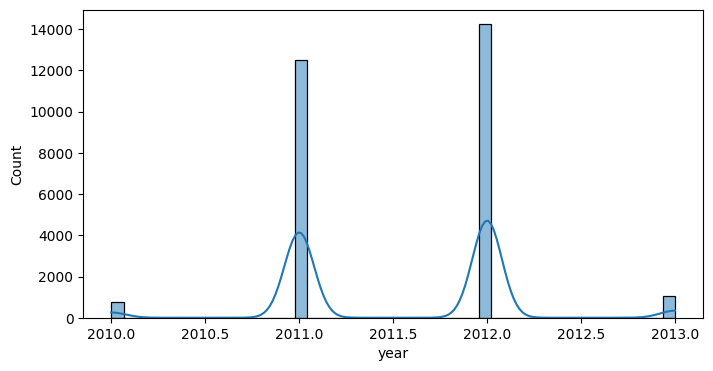

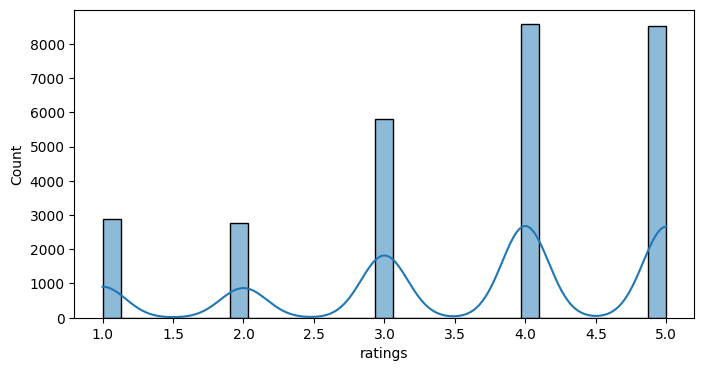

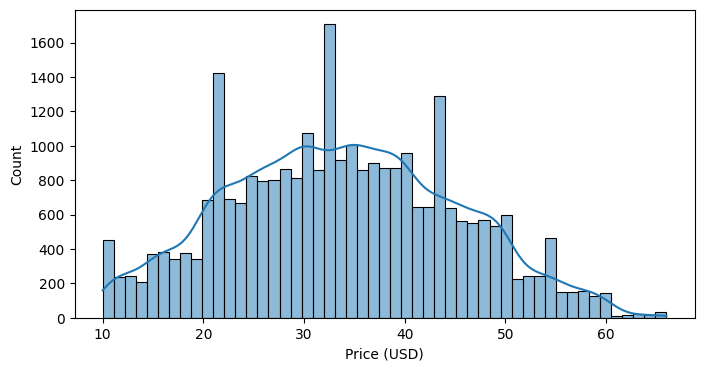

In [23]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


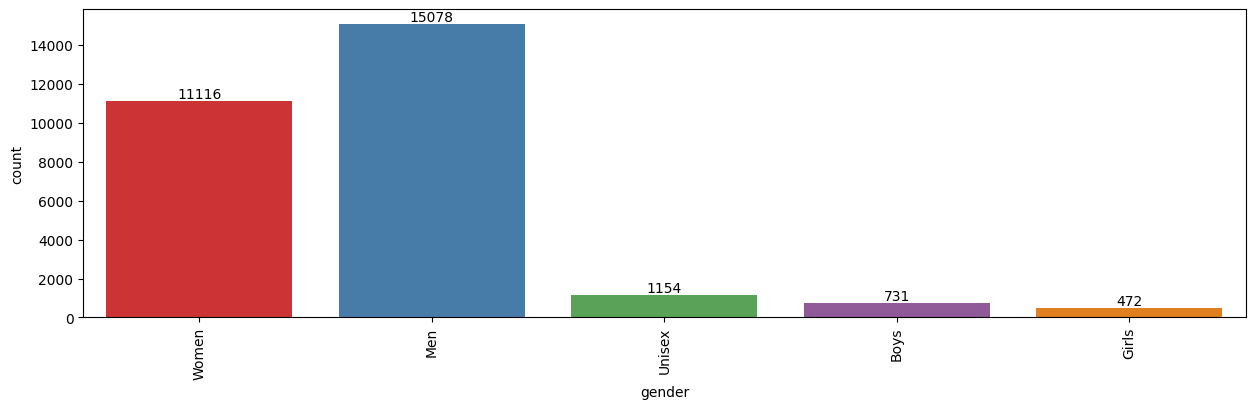

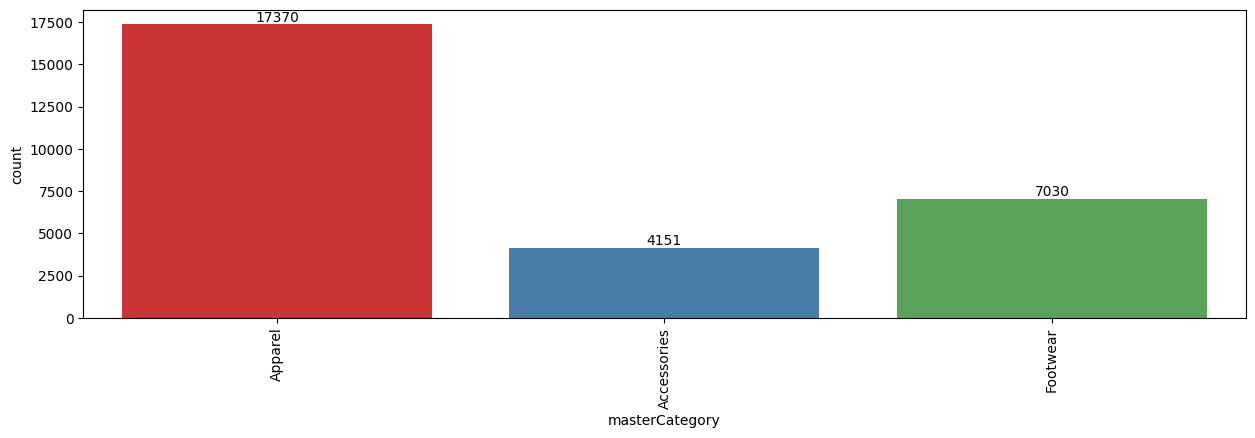

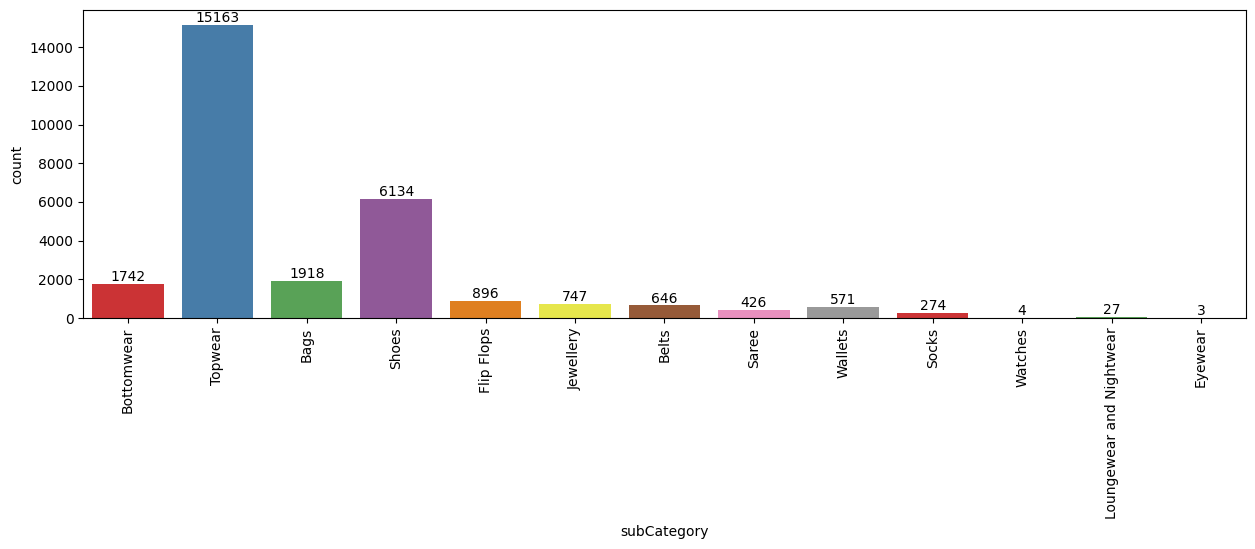

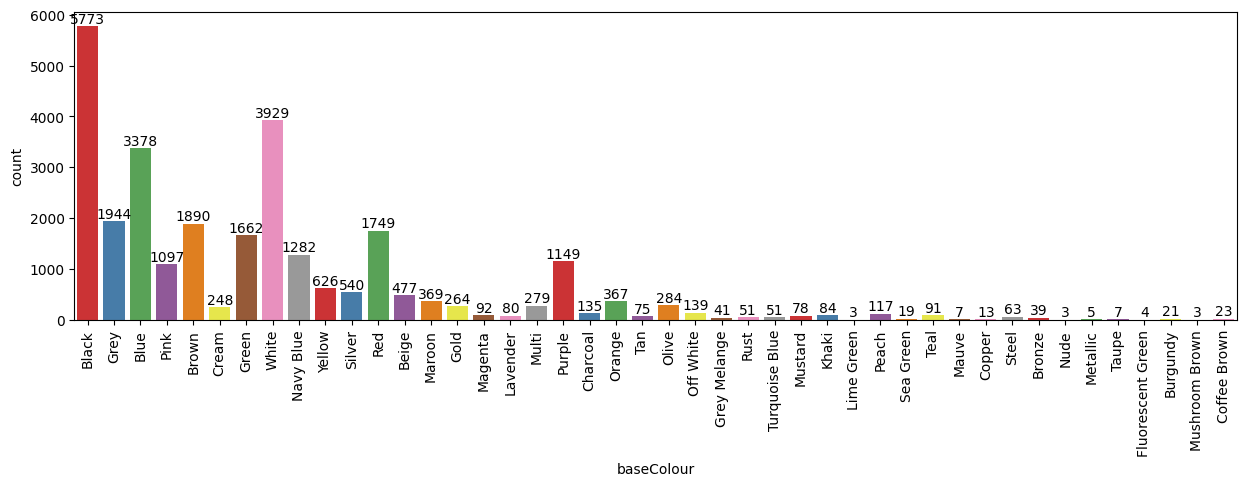

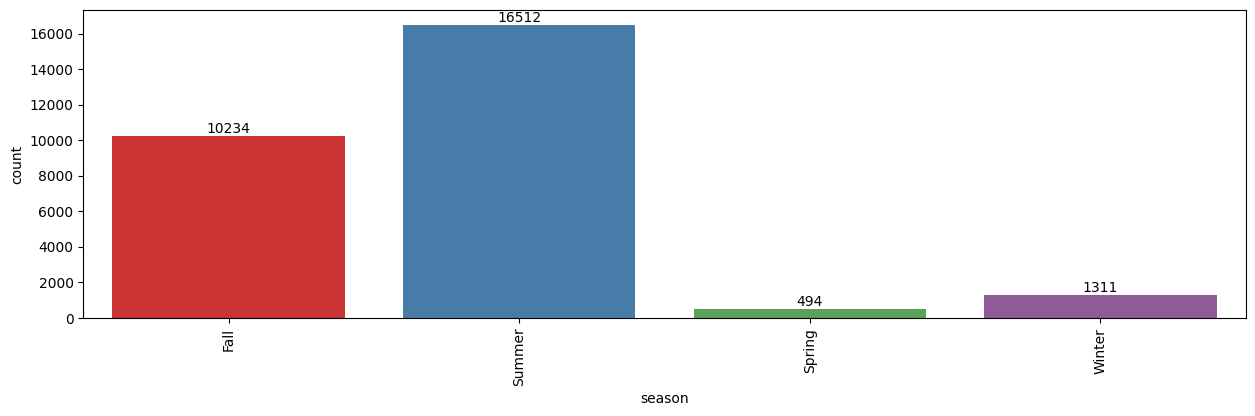

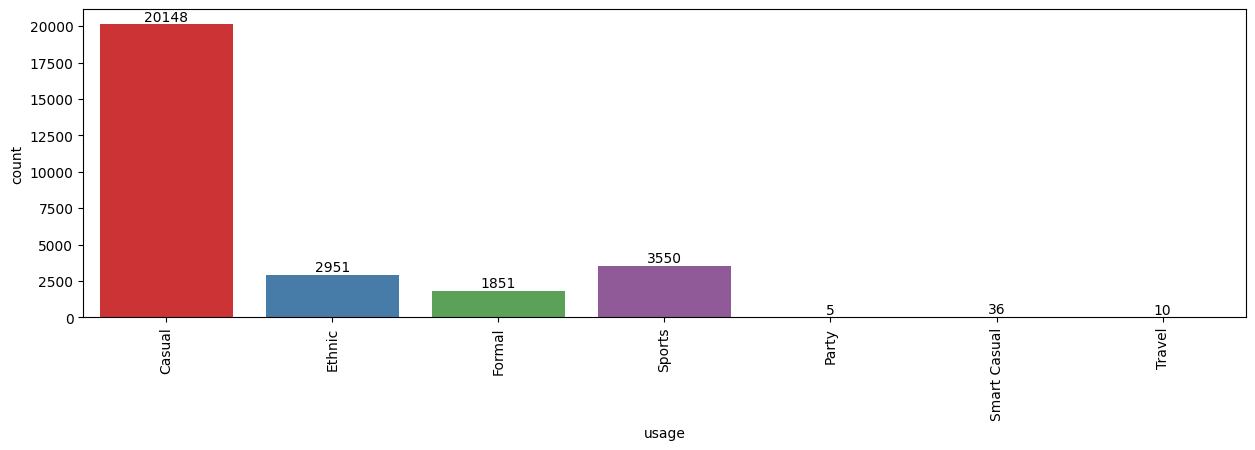

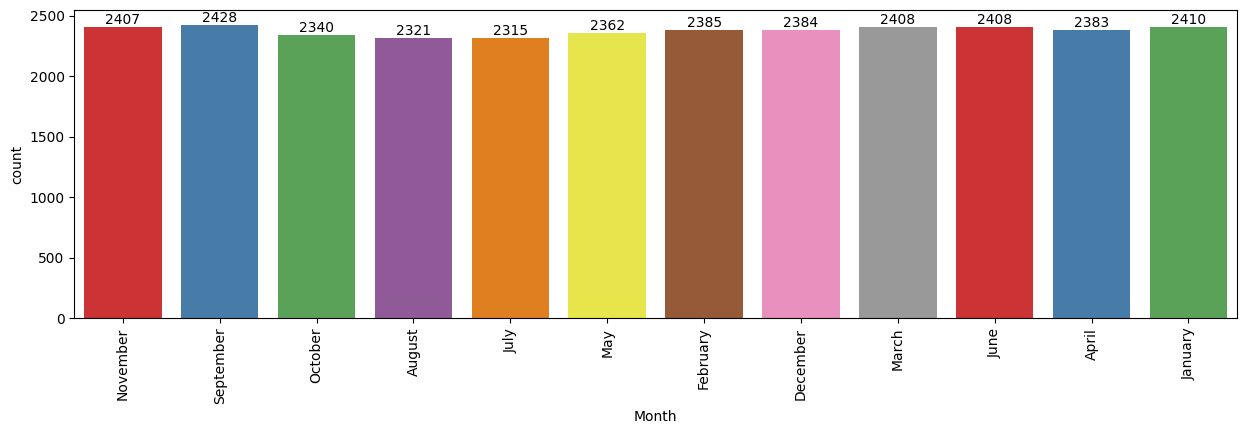

In [24]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

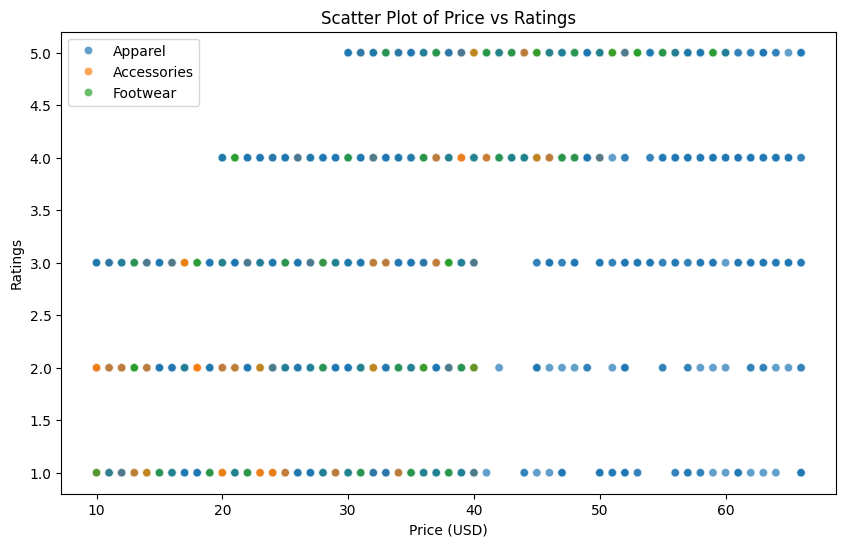

In [25]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

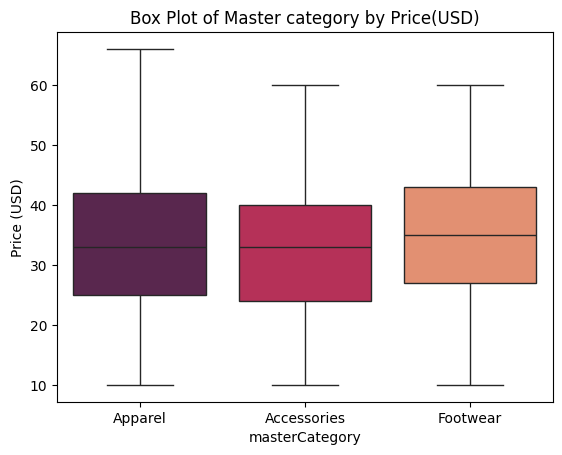

In [26]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

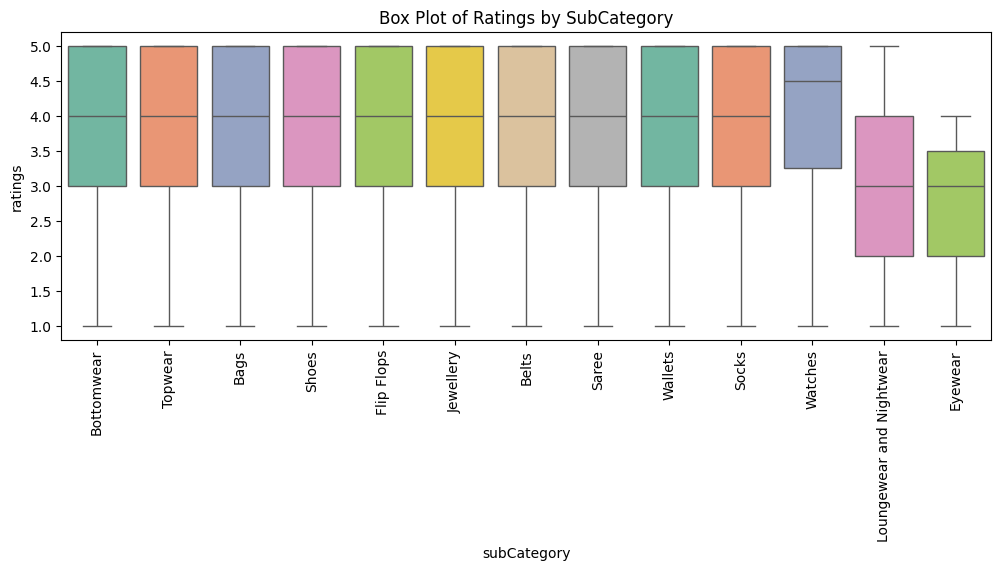

In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

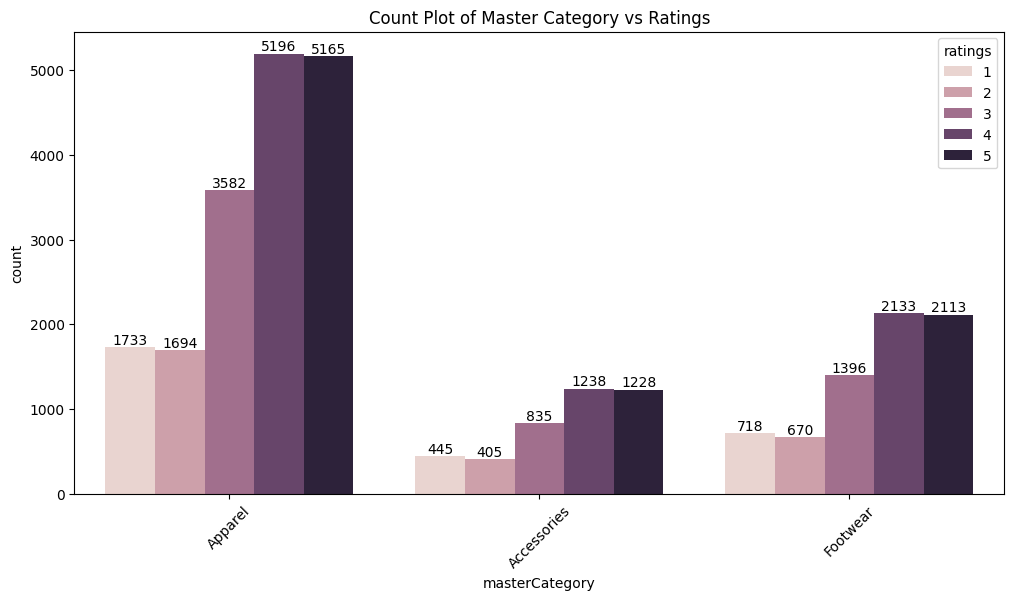

In [28]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

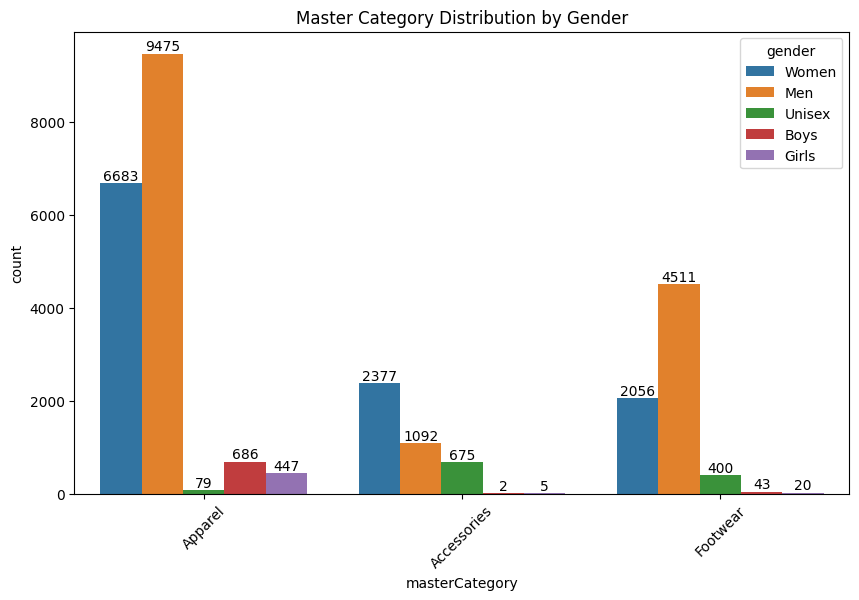

In [29]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

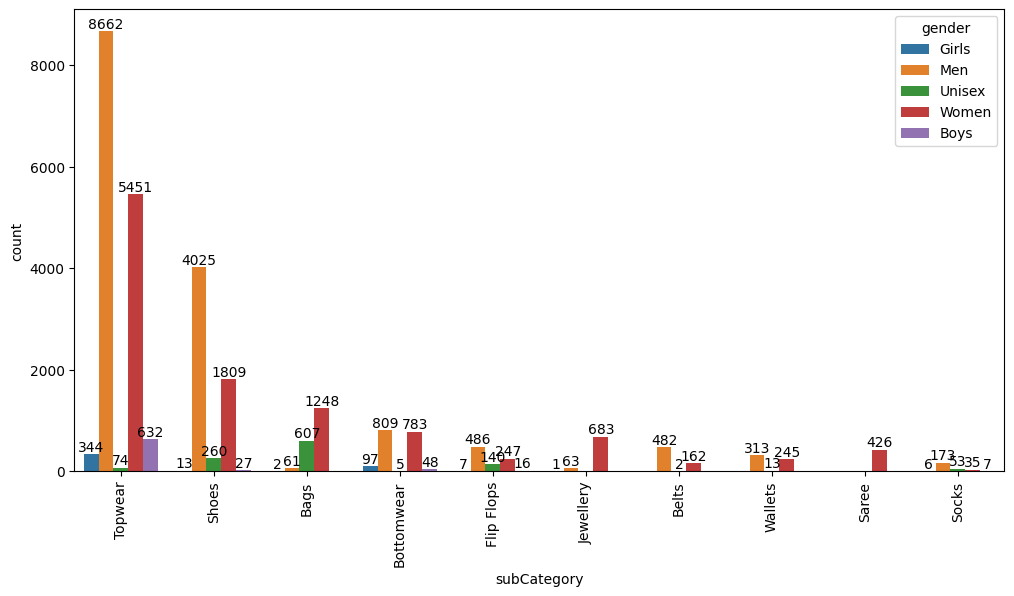

In [31]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

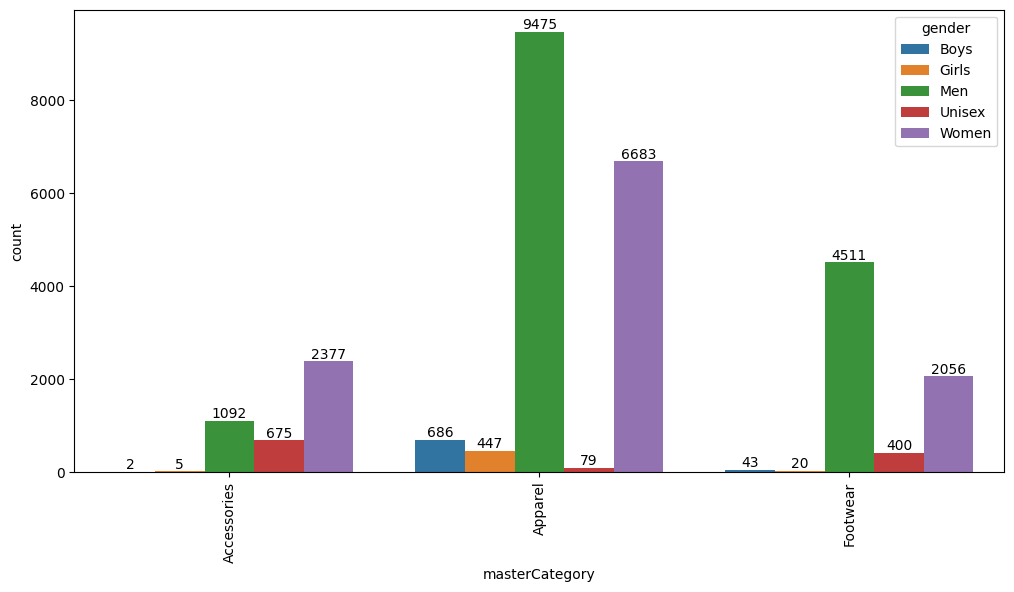

In [32]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

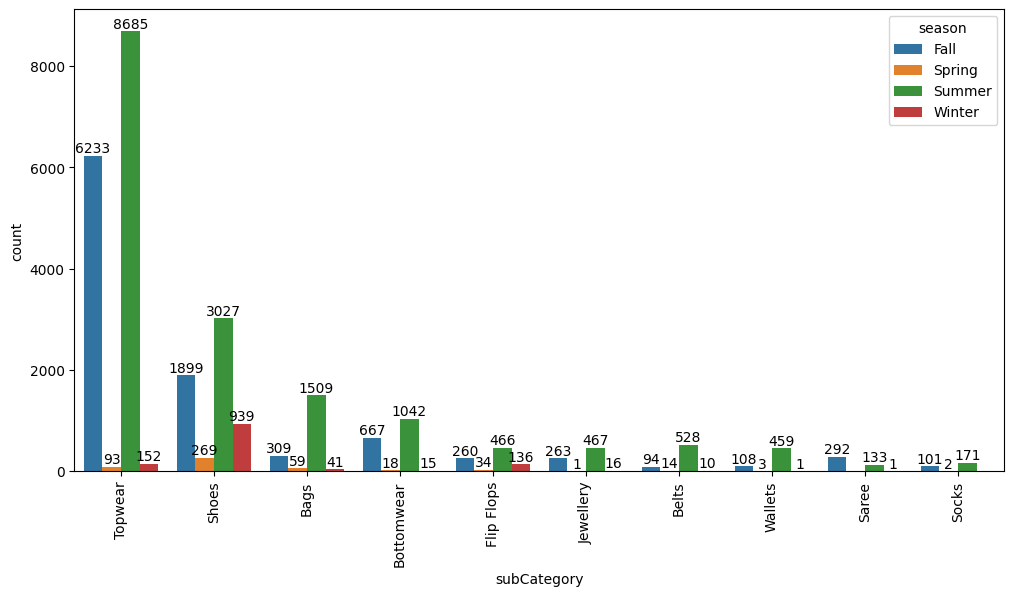

In [33]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

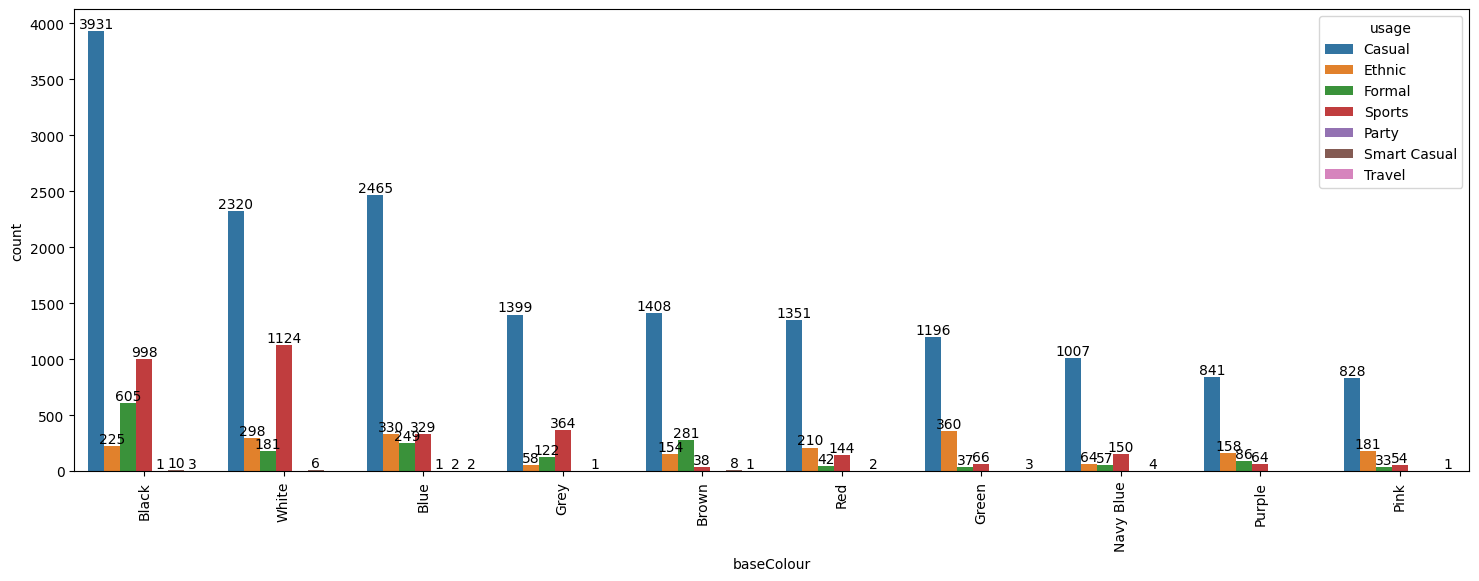

In [34]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

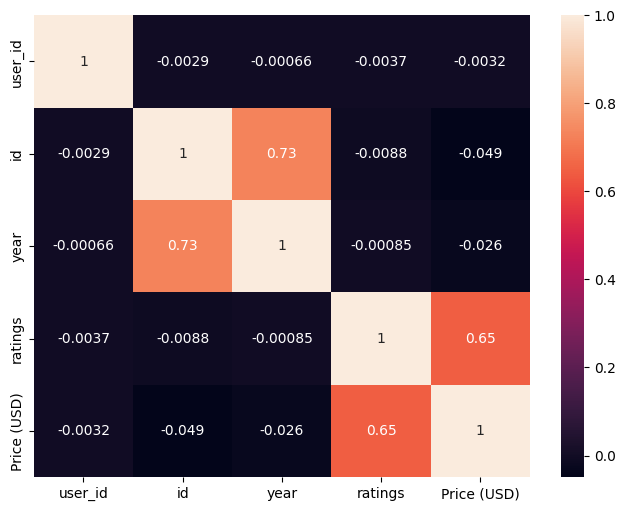

In [35]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Tren analysis based on Month data</h3>

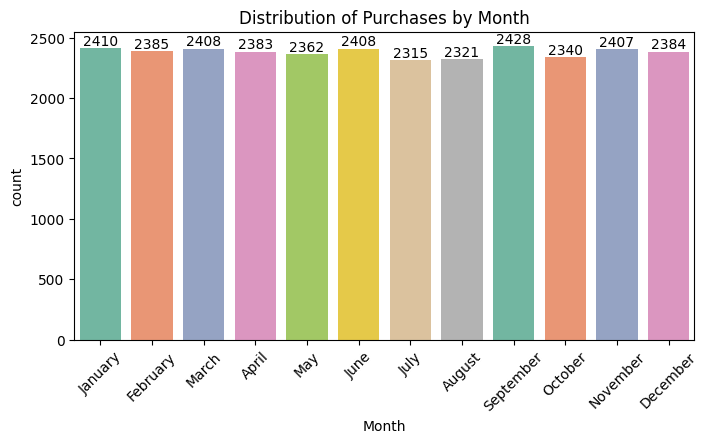

In [36]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

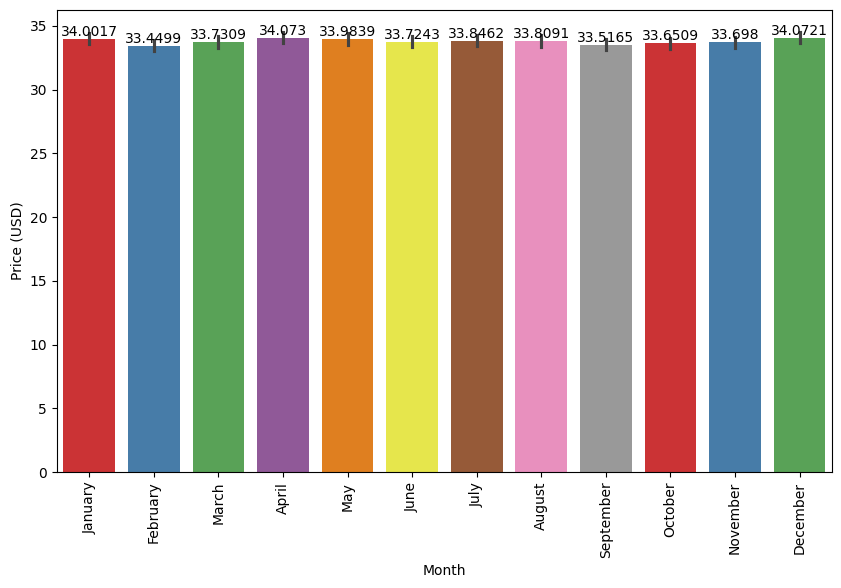

In [37]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

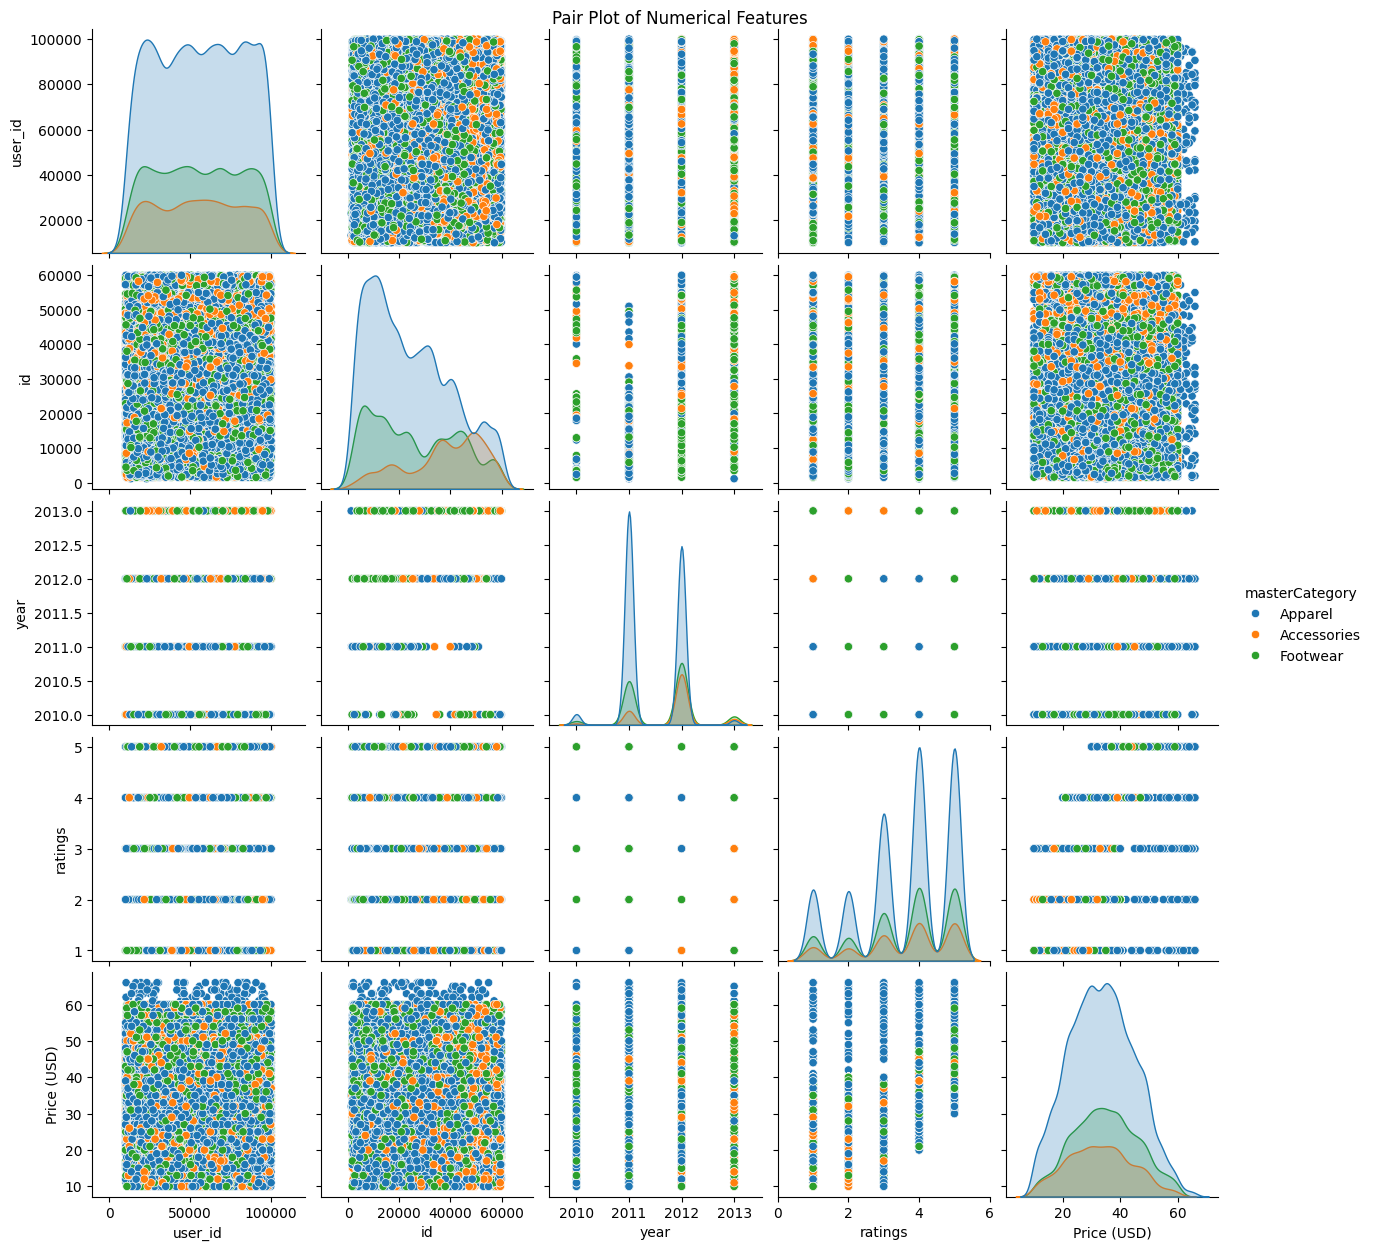

In [38]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [39]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [40]:
df_balanced.year.value_counts()

year
2011.0    7137
2012.0    7137
2010.0    7137
2013.0    7137
Name: count, dtype: int64

In [41]:
df_balanced.head()

user_id     id gender masterCategory subCategory   articleType  \
16573    19828  23248    Men       Footwear       Shoes  Formal Shoes   
1968     54541  20191    Men        Apparel     Topwear       Tshirts   
12353    72493  13836    Men        Apparel  Bottomwear        Shorts   
11940    40735  15577   Boys        Apparel     Topwear       Tshirts   
27269    98470   7768    Men        Apparel     Topwear       Tshirts   

      baseColour  season    year   usage  \
16573      Brown    Fall  2011.0  Formal   
1968        Grey    Fall  2011.0  Casual   
12353  Navy Blue    Fall  2011.0  Casual   
11940       Blue    Fall  2011.0  Casual   
27269       Grey  Summer  2011.0  Sports   

                                productDisplayName   filename  \
16573                  Arrow Men Formal Brown Shoe  23248.jpg   
1968                Wrangler Men Grey Polo T-shirt  20191.jpg   
12353           Probase Men Solid Navy Blue Shorts  13836.jpg   
11940  Chhota Bheem Kids Boys Warrior Bheem TShirt  15577.jpg   
27269  Nike Men's As Vapor Ulti Grey Black T-Shirt   7768.jpg   

                                                    link  ratings  \
16573  http://assets.myntassets.com/v1/images/style/p...        4   
1968   http://assets.myntassets.com/v1/images/style/p...        5   
12353  http://assets.myntassets.com/v1/images/style/p...        1   
11940  http://assets.myntassets.com/v1/images/style/p...        5   
27269  http://assets.myntassets.com/v1/images/style/p...        3   

                                                  review     Month  \
16573              High quality fabric, very satisfied..  February   
1968   Perfect for any occasion, great buy. for casua...    August   
12353  Very disappointed, won't buy again. for specia...     March   
11940  Perfect for any occasion, great buy. for speci...   October   
27269  Fair product, but don't expect much. for every...  November   

       Price (USD)  
16573           39  
1968            44  
12353           56  
11940           55  
27269           20

<Axes: xlabel='year', ylabel='Count'>

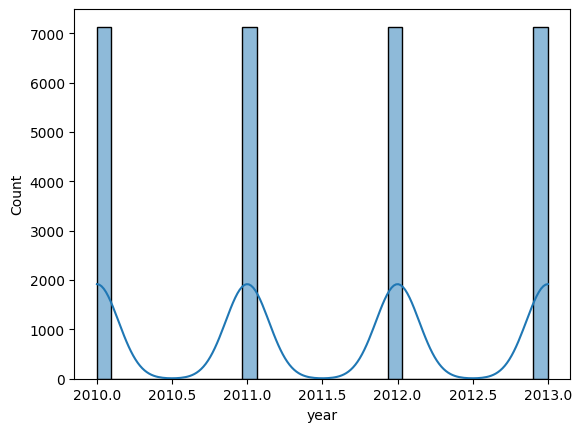

In [42]:
sns.histplot(df_balanced["year"],kde=True)

# Advanced EDA

<h3>clustering analysis</h3>

In [43]:
df.shape

(28551, 17)

In [44]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [45]:
df_encoded

user_id     id  gender  masterCategory  subCategory  articleType  \
0        93810   8493       4               1            2           46   
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           63   
4        28289  12868       2               2            8           16   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0               1       0  2011.0      0   
1              13       2  2012.0      1   
2               1       2  2011.0      0   
3               2       2  2012.0      0   
4               1       1  2012.0      2   
...           ...     ...     ...    ...   
28546          29       2  2012.0      5   
28547          42       0  2011.0      5   
28548           1       2  2013.0      2   
28549           1       2  2012.0      0   
28550          25       3  2011.0      0   

                                      productDisplayName   filename  \
0                         Forever New Women Black Skirts   8493.jpg   
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review  Month  Price (USD)  
0      Amazing quality! Definitely recommend. Would r...      9           46  
1                  Perfect for any occasion, great buy..     11           29  
2                           It's okay, nothing special.!     10           39  
3      Comfortable and stylish, worth the price. and ...      1           39  
4      Satisfactory for the price. for special occasi...      1           24  
...                                                  ...    ...          ...  
28546  Exceeded expectations, love the fit! but could...     11           41  
28547  Perfect for any occasion, great buy. and I'm v...      4           53  
28548              Exceeded expectations, love the fit!.      9           43  
28549  High quality fabric, very satisfied. and I'm v...      9           48  
28550            Not as de

In [46]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])

In [47]:
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [48]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [49]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

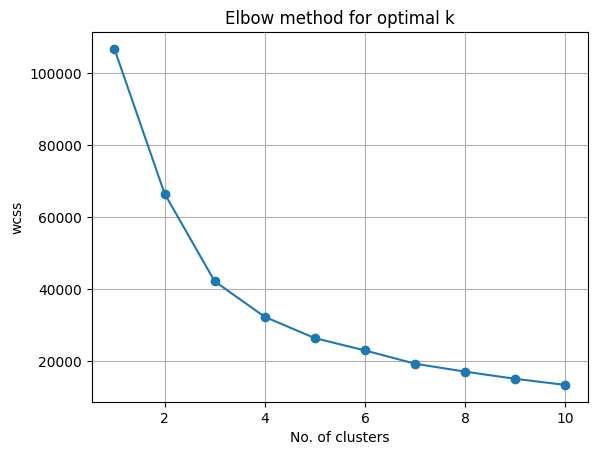

In [50]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [51]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

pca1      pca2
0     -0.429872  1.532470
1     -0.436964 -0.014366
2     -2.464212  0.116658
3      0.264773  1.068773
4     -0.197315 -0.542015
...         ...       ...
28546  0.943306  1.384033
28547  2.547851  1.992272
28548 -1.120116  1.742129
28549 -1.313849  1.894369
28550 -0.851451 -1.934678

[28551 rows x 2 columns]

In [52]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

pca1      pca2  cluster
0     -0.429872  1.532470        0
1     -0.436964 -0.014366        1
2     -2.464212  0.116658        1
3      0.264773  1.068773        0
4     -0.197315 -0.542015        2
...         ...       ...      ...
28546  0.943306  1.384033        0
28547  2.547851  1.992272        0
28548 -1.120116  1.742129        1
28549 -1.313849  1.894369        1
28550 -0.851451 -1.934678        2

[28551 rows x 3 columns]

In [53]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [54]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [55]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

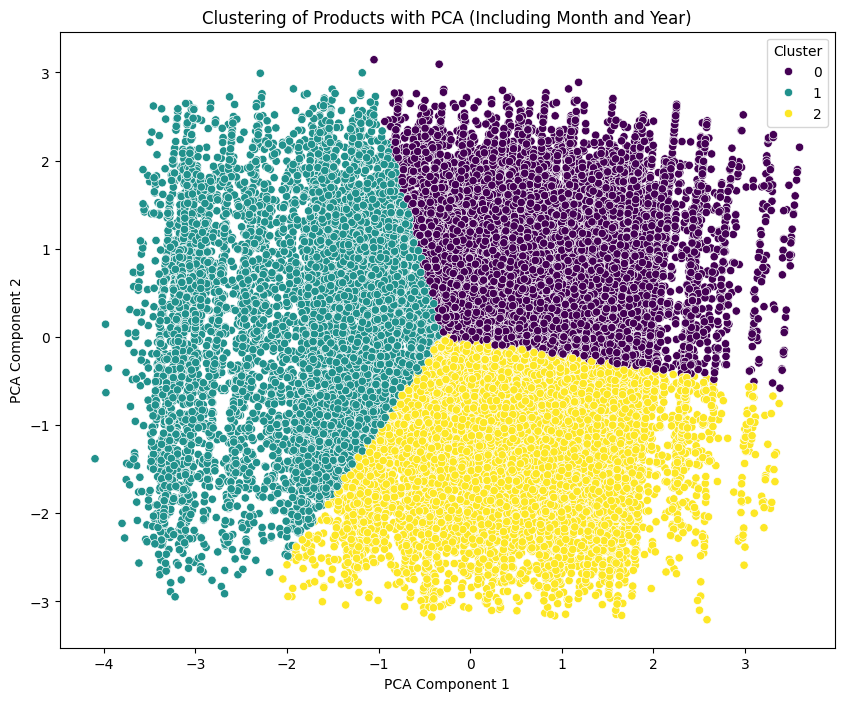

In [56]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [57]:
df.shape

(28551, 18)

***image processing***

In [58]:
import tensorflow as tf
import os

In [59]:
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
# Image processing parameters
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [61]:
image_folder = r'/content/drive/MyDrive/images'

In [62]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [63]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: /content/drive/MyDrive/images/8493.jpg
File does not exist: /content/drive/MyDrive/images/30757.jpg
File does not exist: /content/drive/MyDrive/images/14881.jpg
File does not exist: /content/drive/MyDrive/images/39425.jpg
File does not exist: /content/drive/MyDrive/images/12347.jpg


In [64]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

user_id     id  gender masterCategory subCategory   articleType  \
3        46048  48449     Men        Apparel     Topwear       Tshirts   
4        28289  12868     Men       Footwear       Shoes  Formal Shoes   
5        23434  17968     Men       Footwear  Flip Flops    Flip Flops   
6        98696   3940   Women        Apparel     Topwear       Tshirts   
7        81482  46596   Women       Footwear       Shoes         Heels   
...        ...    ...     ...            ...         ...           ...   
28546    73318  54078     Men       Footwear       Shoes  Sports Shoes   
28547    18851  13183     Men       Footwear       Shoes  Sports Shoes   
28548    55457  10264     Men       Footwear       Shoes  Formal Shoes   
28549    40311  45378   Women       Footwear       Shoes         Flats   
28550    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
3           Blue  Summer  2012.0  Casual   
4          Black  Spring  2012.0  Formal   
5          Black    Fall  2011.0  Casual   
6           Pink  Summer  2011.0  Casual   
7          Brown  Winter  2012.0  Casual   
...          ...     ...     ...     ...   
28546     Orange  Summer  2012.0  Sports   
28547      White    Fall  2011.0  Sports   
28548      Black  Summer  2013.0  Formal   
28549      Black  Summer  2012.0  Casual   
28550  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
5                          Puma Men Splash Black Slipper  17968.jpg   
6            Jealous 21 Women's Pink Black Print T-shirt   3940.jpg   
7                            Catwalk Women Olive Sandals  46596.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
5      http://assets.myntassets.com/v1/images/style/p...        4   
6      http://assets.myntassets.com/v1/images/style/p...        4   
7      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
5                  Exceeded expectations, love the fit!!       July   
6      High quality fabric, very satisfied. for speci...  September   
7                  High quality fabric, very satisfied..        May   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

       Price (USD)  cluster  
3               39      

In [65]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [66]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 28546


In [67]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [68]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [69]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [70]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 893


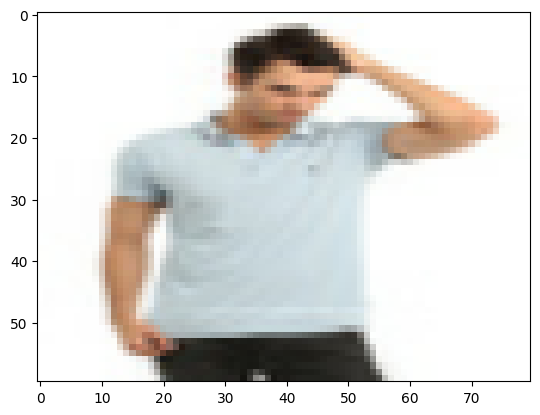

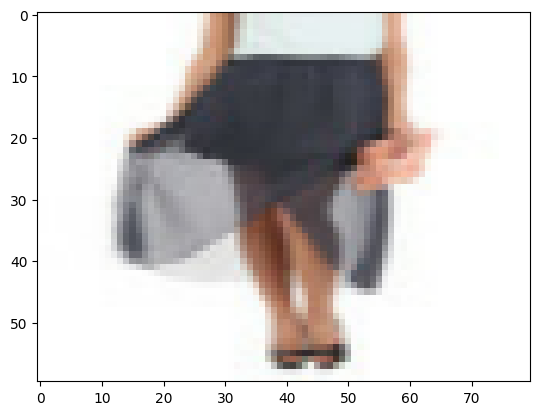

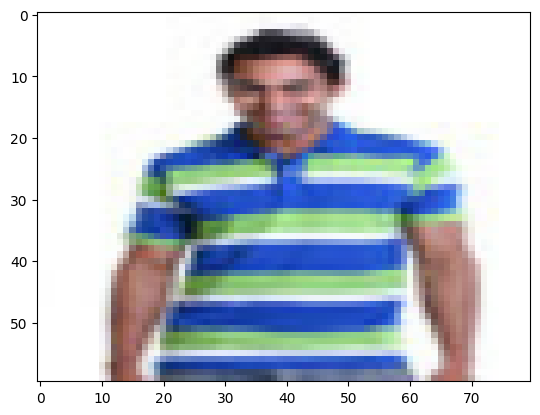

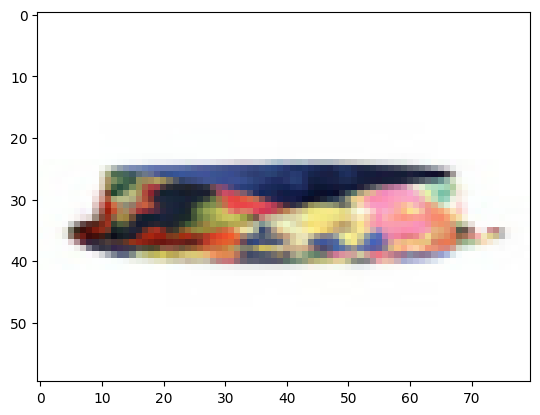

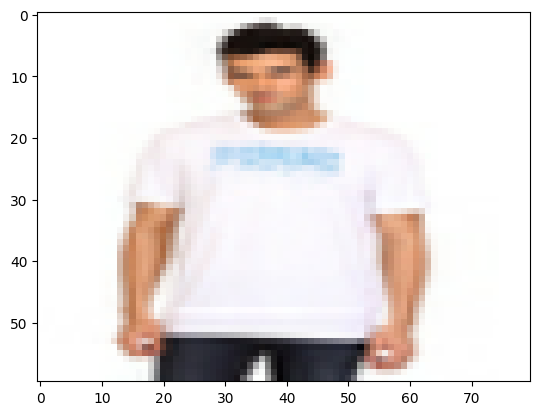

In [71]:
for images_batch in dataset.take(5):
    plt.imshow(images_batch[0])
    plt.show()

***Content-based filtering***

In [72]:
df

user_id     id  gender masterCategory subCategory   articleType  \
3        46048  48449     Men        Apparel     Topwear       Tshirts   
4        28289  12868     Men       Footwear       Shoes  Formal Shoes   
5        23434  17968     Men       Footwear  Flip Flops    Flip Flops   
6        98696   3940   Women        Apparel     Topwear       Tshirts   
7        81482  46596   Women       Footwear       Shoes         Heels   
...        ...    ...     ...            ...         ...           ...   
28546    73318  54078     Men       Footwear       Shoes  Sports Shoes   
28547    18851  13183     Men       Footwear       Shoes  Sports Shoes   
28548    55457  10264     Men       Footwear       Shoes  Formal Shoes   
28549    40311  45378   Women       Footwear       Shoes         Flats   
28550    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
3           Blue  Summer  2012.0  Casual   
4          Black  Spring  2012.0  Formal   
5          Black    Fall  2011.0  Casual   
6           Pink  Summer  2011.0  Casual   
7          Brown  Winter  2012.0  Casual   
...          ...     ...     ...     ...   
28546     Orange  Summer  2012.0  Sports   
28547      White    Fall  2011.0  Sports   
28548      Black  Summer  2013.0  Formal   
28549      Black  Summer  2012.0  Casual   
28550  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
5                          Puma Men Splash Black Slipper  17968.jpg   
6            Jealous 21 Women's Pink Black Print T-shirt   3940.jpg   
7                            Catwalk Women Olive Sandals  46596.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
5      http://assets.myntassets.com/v1/images/style/p...        4   
6      http://assets.myntassets.com/v1/images/style/p...        4   
7      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
5                  Exceeded expectations, love the fit!!       July   
6      High quality fabric, very satisfied. for speci...  September   
7                  High quality fabric, very satisfied..        May   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

       Price (USD)  cluster  
3               39      

In [73]:
df.columns

Index(['user_id', 'id', 'gender', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'filename', 'link', 'ratings', 'review', 'Month',
       'Price (USD)', 'cluster'],
      dtype='object')

In [74]:
numnames

['id', 'year', 'ratings', 'Price (USD)']

In [75]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [76]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
masterCategory_mapping = {label: idx for label, idx in zip(le_dict['masterCategory'].classes_, le_dict['masterCategory'].transform(le_dict['masterCategory'].classes_))}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Master Category Mapping (Original to Encoded):", masterCategory_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
       user_id     id  gender  masterCategory  subCategory  articleType  \
3        46048  48449       2               1           10           62   
4        28289  12868       2               2            8           16   
5        23434  17968       2               2            4           15   
6        98696   3940       4               1           10           62   
7        81482  46596       4               2            8           18   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
3               2       2  2012.0   

In [77]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

user_id     id  gender  masterCategory  subCategory  articleType  \
0        46048  48449       2               1           10           62   
1        28289  12868       2               2            8           16   
2        23434  17968       2               2            4           15   
3        98696   3940       4               1           10           62   
4        81482  46596       4               2            8           18   
...        ...    ...     ...             ...          ...          ...   
28541    73318  54078       2               2            8           48   
28542    18851  13183       2               2            8           48   
28543    55457  10264       2               2            8           16   
28544    40311  45378       4               2            8           14   
28545    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0               2       2  2012.0      0   
1               1       1  2012.0      2   
2               1       0  2011.0      0   
3              31       2  2011.0      0   
4               4       3  2012.0      0   
...           ...     ...     ...    ...   
28541          29       2  2012.0      5   
28542          42       0  2011.0      5   
28543           1       2  2013.0      2   
28544           1       2  2012.0      0   
28545          25       3  2011.0      0   

                                      productDisplayName   filename  \
0                     French Connection Men Blue T-shirt  48449.jpg   
1                      Lee Cooper Men Formal Black Shoes  12868.jpg   
2                          Puma Men Splash Black Slipper  17968.jpg   
3            Jealous 21 Women's Pink Black Print T-shirt   3940.jpg   
4                            Catwalk Women Olive Sandals  46596.jpg   
...                                                  ...        ...   
28541    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28542                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28543    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28544                          Rocia Women Black Sandals  45378.jpg   
28545  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        3   
2      http://assets.myntassets.com/v1/images/style/p...        4   
3      http://assets.myntassets.com/v1/images/style/p...        4   
4      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28541  http://assets.myntassets.com/v1/images/style/p...        5   
28542  http://assets.myntassets.com/v1/images/style/p...        5   
28543  http://assets.myntassets.com/v1/images/style/p...        5   
28544  http://assets.myntassets.com/v1/images/style/p...        5   
28545  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review  Month  Price (USD)  \
0      Comfortable and stylish, worth the price. and ...      1           39   
1      Satisfactory for the price. for special occasi...      1           24   
2                  Exceeded expectations, love the fit!!      5           50   
3      High quality fabric, very satisfied. for speci...     11           24   
4                  High quality fabric, very satisfied..      8           24   
...                                                  ...    ...          ...   
28541  Exceeded expectations, love the fit! but could...     11           41   
28542  Perfect for any occasion, great buy. and I'm v...      4           53   
28543              Exceeded expectations, love the fit!.      9           43   
28544  High quality fabric, very satisfied. and I'm v...      9           48   
28545          

In [78]:
df_encoded.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [79]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

id  gender  masterCategory  subCategory  articleType  baseColour  \
0      48449       2               1           10           62           2   
1      12868       2               2            8           16           1   
2      17968       2               2            4           15           1   
3       3940       4               1           10           62          31   
4      46596       4               2            8           18           4   
...      ...     ...             ...          ...          ...         ...   
28541  54078       2               2            8           48          29   
28542  13183       2               2            8           48          42   
28543  10264       2               2            8           16           1   
28544  45378       4               2            8           14           1   
28545   5864       3               2            8            7          25   

       season  usage                                 productDisplayName  \
0           2      0                 French Connection Men Blue T-shirt   
1           1      2                  Lee Cooper Men Formal Black Shoes   
2           0      0                      Puma Men Splash Black Slipper   
3           2      0        Jealous 21 Women's Pink Black Print T-shirt   
4           3      0                        Catwalk Women Olive Sandals   
...       ...    ...                                                ...   
28541       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
28542       0      5                 Fila Men Dls 96 White Sports Shoes   
28543       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
28544       2      0                          Rocia Women Black Sandals   
28545       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

       Month  cluster   ratings  Price (USD)      year  
0          1        0  1.096556     0.459903  0.745017  
1          1        2 -0.465590    -0.865725  0.745017  
2          5        0  0.315483     1.432031 -0.890800  
3         11        2  0.315483    -0.865725 -0.890800  
4          8        1  0.315483    -0.865725  0.745017  
...      ...      ...       ...          ...       ...  
28541     11        0  1.096556     0.636654  0.745017  
28542      4        0  1.096556     1.697157 -0.890800  
28543      9        1  1.096556     0.813404  2.380834  
28544      9        1  1.096556     1.255281  0.745017  
28545      3        2 -1.246664    -1.837852 -0.890800  

[28546 rows x 14 columns]

In [80]:
# subset_size = 2000
# df_sample = df.sample(n=subset_size, random_state=42)
# df_sample.reset_index(drop=True, inplace=True)
# df_sample

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [83]:
# from sklearn.metrics.pairwise import cosine_similarity

# similarity_matrices = {}
# for cluster_id in range(3):
#     cluster_items = processed_dataset[processed_dataset['cluster'] == cluster_id]
#     cluster_tfidf = tfidf_matrix[cluster_items.index]

#     similarity_matrix = cosine_similarity(cluster_tfidf)
#     similarity_matrices[cluster_id] = similarity_matrix

In [84]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Flip Flops', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Flip Flops', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes','Flip Flops'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

# the problem is with the mapping and not with clustering or anything, need to rectify this

Encoded Complementary Map: {10: [2, 8, 4, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 4, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 8, 4], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [85]:
df['subCategory'].unique()

array(['Topwear', 'Shoes', 'Flip Flops', 'Bottomwear', 'Jewellery',
       'Belts', 'Saree', 'Bags', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

In [86]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [87]:
processed_dataset[processed_dataset.subCategory==7].id

40       57964
75       53044
84       34981
103      59598
129      49927
         ...  
28158    50910
28235    59670
28274    49928
28355    59667
28364    59614
Name: id, Length: 426, dtype: int64

In [88]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [89]:
# from sklearn.metrics.pairwise import cosine_similarity

# def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
#     # Get the index and details of the target product
#     try:
#         product_index = df_encoded[df_encoded['id'] == product_id].index[0]
#     except IndexError:
#         print(f"Product ID {product_id} not found in the dataset")
#         return []

#     # Extract TF-IDF vector for the target product
#     target_vector = tfidf_matrix[product_index].reshape(1, -1)

#     # Get target product's attributes
#     encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
#     product_gender = df_encoded.loc[product_index, 'gender']
#     encoded_colour = df_encoded.loc[product_index, 'baseColour']

#     print(f"Product Index: {product_index}")
#     print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
#     print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

#     # Fetch complementary subcategories and color mappings for the target product
#     complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
#     complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])

#     # Initialize dictionary to store the best item from each complementary subcategory
#     recommendations = {}

#     # Iterate over each complementary subcategory to find the best matching item
#     for comp_subcategory in complementary_subcategories:
#         # First, filter items by strict criteria
#         comp_items_strict = df_encoded[(df_encoded['subCategory'] == comp_subcategory) &
#                                        (df_encoded['gender'] == product_gender) &
#                                        (df_encoded['baseColour'].isin(complementary_colours))]

#         # Relaxed filter (if strict filtering yields no results)
#         if comp_items_strict.empty:
#             print(f"No strict matches found for {comp_subcategory}. Using relaxed filtering.")
#             comp_items_relaxed = df_encoded[(df_encoded['subCategory'] == comp_subcategory) &
#                                             (df_encoded['gender'] == product_gender)]
#         else:
#             comp_items_relaxed = comp_items_strict

#         # If no items at all found, log and skip
#         if comp_items_relaxed.empty:
#             print(f"No items found for subcategory: {comp_subcategory} with relaxed filtering.")
#             continue

#         # Calculate similarity scores with relaxed filter items
#         comp_indices = comp_items_relaxed.index
#         comp_vectors = tfidf_matrix[comp_indices]
#         similarity_scores = cosine_similarity(target_vector, comp_vectors).flatten()

#         # Select the best match in terms of similarity score
#         best_match_index = comp_indices[similarity_scores.argmax()]
#         best_match_id = df_encoded.loc[best_match_index, 'id']
#         best_similarity_score = similarity_scores.max()

#         # Store the best item for this subcategory
#         recommendations[comp_subcategory] = (best_match_id, best_similarity_score)

#     # Collect the recommended product IDs
#     recommended_product_ids = [item[0] for item in recommendations.values()]

#     # Check if all complementary subcategories were covered
#     missing_subcategories = set(complementary_subcategories) - set(recommendations.keys())
#     if missing_subcategories:
#         print(f"Some complementary subcategories could not be filled in the outfit: {missing_subcategories}")

#     return recommended_product_ids


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the index and details of the target product
    try:
        product_index = df_encoded[df_encoded['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract TF-IDF vector for the target product
    target_vector = tfidf_matrix[product_index]

    # Get target product's attributes
    encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
    product_gender = df_encoded.loc[product_index, 'gender']
    encoded_colour = df_encoded.loc[product_index, 'baseColour']
    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
    print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

    # Initialize recommendations dictionary for unique items from each complementary subcategory
    recommendations = {}
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])
    footwear_selected = False  # Track if a footwear item has already been added

    for idx, row in df_encoded.iterrows():
        # Skip the target item itself
        if idx == product_index:
            continue

        # Compute similarity score with the target item
        item_vector = tfidf_matrix[idx]
        similarity_score = cosine_similarity(target_vector, item_vector.reshape(1, -1))[0][0]

        # Retrieve details of the current item
        recommended_subcategory = row['subCategory']
        recommended_master_category = row['masterCategory']
        recommended_colour = row['baseColour']

        # Check conditions for complementary subcategory, gender, color contrast, and footwear restriction
        if (recommended_subcategory in complementary_subcategories and
            row['gender'] == product_gender and
            recommended_colour in complementary_colours):

            # If the item belongs to 'Footwear', ensure only one item is selected
            if recommended_master_category == 2:
                if footwear_selected:
                    continue  # Skip if a footwear item is already added
                else:
                    footwear_selected = True  # Mark footwear as selected

            # Add or replace recommendation if this item has higher similarity
            if (recommended_subcategory not in recommendations or
                recommendations[recommended_subcategory][1] < similarity_score):

                recommendations[recommended_subcategory] = (row['id'], similarity_score)

            # Stop if all complementary subcategories are covered
            if len(recommendations) == len(complementary_subcategories):
                break

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    if len(recommended_product_ids) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommended_product_ids


In [91]:
processed_dataset.id.sample(5)

27111     4486
20924    53652
19056     6214
14739     2760
10909     2544
Name: id, dtype: int64

In [92]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [93]:
gender_mapping

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}

In [94]:
product_id= 53044
recommended_products = get_recommendations(product_id,df_encoded,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Product Index: 75
Encoded Subcategory: 7, Gender: 4, Colour: 22
Subcategory: Saree
Some complementary subcategories could not be found.
Recommended products: [43705, 45406, 53066]


In [95]:
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_products:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['//content//drive//MyDrive//images//43705.jpg',
 '//content//drive//MyDrive//images//45406.jpg',
 '//content//drive//MyDrive//images//53066.jpg']

In [96]:
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

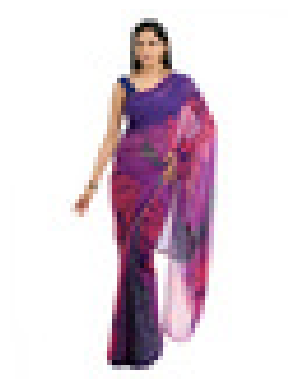

In [97]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [98]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

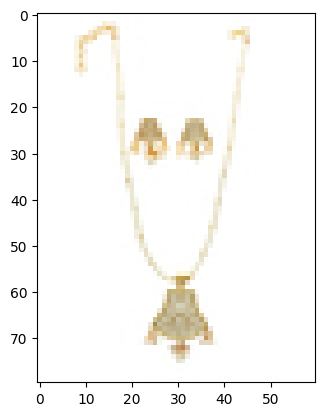

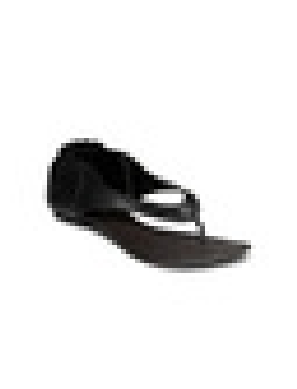

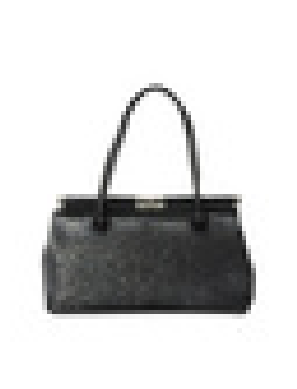

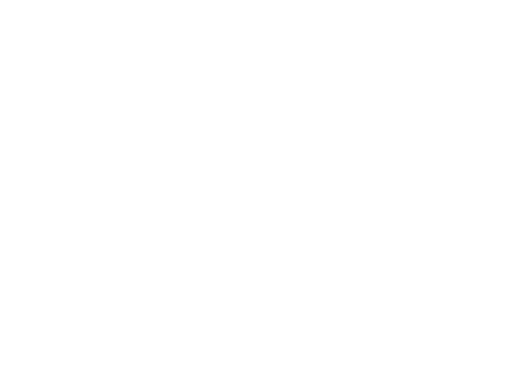

In [99]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

# **Deep Neural Network**

In [100]:
df.head()

user_id     id gender masterCategory subCategory   articleType baseColour  \
0    46048  48449    Men        Apparel     Topwear       Tshirts       Blue   
1    28289  12868    Men       Footwear       Shoes  Formal Shoes      Black   
2    23434  17968    Men       Footwear  Flip Flops    Flip Flops      Black   
3    98696   3940  Women        Apparel     Topwear       Tshirts       Pink   
4    81482  46596  Women       Footwear       Shoes         Heels      Brown   

   season    year   usage                           productDisplayName  \
0  Summer  2012.0  Casual           French Connection Men Blue T-shirt   
1  Spring  2012.0  Formal            Lee Cooper Men Formal Black Shoes   
2    Fall  2011.0  Casual                Puma Men Splash Black Slipper   
3  Summer  2011.0  Casual  Jealous 21 Women's Pink Black Print T-shirt   
4  Winter  2012.0  Casual                  Catwalk Women Olive Sandals   

    filename                                               link  ratings  \
0  48449.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
1  12868.jpg  http://assets.myntassets.com/v1/images/style/p...        3   
2  17968.jpg  http://assets.myntassets.com/v1/images/style/p...        4   
3   3940.jpg  http://assets.myntassets.com/v1/images/style/p...        4   
4  46596.jpg  http://assets.myntassets.com/v1/images/style/p...        4   

                                              review      Month  Price (USD)  \
0  Comfortable and stylish, worth the price. and ...     August           39   
1  Satisfactory for the price. for special occasi...     August           24   
2              Exceeded expectations, love the fit!!       July           50   
3  High quality fabric, very satisfied. for speci...  September           24   
4              High quality fabric, very satisfied..        May           24   

   cluster  
0        0  
1        2  
2        0  
3        2  
4        1

In [101]:
# Encode categorical features (e.g., gender, color, usage)
label_encoder_gender = LabelEncoder()
df['gender_encoded'] = label_encoder_gender.fit_transform(df['gender'])
gender_mapping = {label: idx for label, idx in zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_))}
print("Gender Mapping:", gender_mapping)

label_encoder_color = LabelEncoder()
df['baseColour_encoded'] = label_encoder_color.fit_transform(df['baseColour'])
colour_mapping = {label: idx for label, idx in zip(label_encoder_color.classes_, label_encoder_color.transform(label_encoder_color.classes_))}
print("Colour Mapping:", colour_mapping)

label_encoder_usage = LabelEncoder()
df['usage_encoded'] = label_encoder_usage.fit_transform(df['usage'])
usage_mapping = {label: idx for label, idx in zip(label_encoder_usage.classes_, label_encoder_usage.transform(label_encoder_usage.classes_))}
print("Usage Mapping:", usage_mapping)

Gender Mapping: {'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}
Colour Mapping: {'Beige': 0, 'Black': 1, 'Blue': 2, 'Bronze': 3, 'Brown': 4, 'Burgundy': 5, 'Charcoal': 6, 'Coffee Brown': 7, 'Copper': 8, 'Cream': 9, 'Fluorescent Green': 10, 'Gold': 11, 'Green': 12, 'Grey': 13, 'Grey Melange': 14, 'Khaki': 15, 'Lavender': 16, 'Lime Green': 17, 'Magenta': 18, 'Maroon': 19, 'Mauve': 20, 'Metallic': 21, 'Multi': 22, 'Mushroom Brown': 23, 'Mustard': 24, 'Navy Blue': 25, 'Nude': 26, 'Off White': 27, 'Olive': 28, 'Orange': 29, 'Peach': 30, 'Pink': 31, 'Purple': 32, 'Red': 33, 'Rust': 34, 'Sea Green': 35, 'Silver': 36, 'Steel': 37, 'Tan': 38, 'Taupe': 39, 'Teal': 40, 'Turquoise Blue': 41, 'White': 42, 'Yellow': 43}
Usage Mapping: {'Casual': 0, 'Ethnic': 1, 'Formal': 2, 'Party': 3, 'Smart Casual': 4, 'Sports': 5, 'Travel': 6}


In [102]:
# Scale numerical features (e.g., price)
scaler = StandardScaler()
df['Price (USD)_scaled'] = scaler.fit_transform(df[['Price (USD)']])

In [103]:
# Encode subcategory as target variable (One-Hot Encoding for classification)
label_encoder_subcategory = LabelEncoder()
df['subCategory_encoded'] = label_encoder_subcategory.fit_transform(df['subCategory'])
subcategory_mapping = {label: idx for label, idx in zip(label_encoder_subcategory.classes_, label_encoder_subcategory.transform(label_encoder_subcategory.classes_))}
print("Subcategory Mapping:", subcategory_mapping)

Subcategory Mapping: {'Bags': 0, 'Belts': 1, 'Bottomwear': 2, 'Eyewear': 3, 'Flip Flops': 4, 'Jewellery': 5, 'Loungewear and Nightwear': 6, 'Saree': 7, 'Shoes': 8, 'Socks': 9, 'Topwear': 10, 'Wallets': 11, 'Watches': 12}


In [104]:
df.head()

user_id     id gender masterCategory subCategory   articleType baseColour  \
0    46048  48449    Men        Apparel     Topwear       Tshirts       Blue   
1    28289  12868    Men       Footwear       Shoes  Formal Shoes      Black   
2    23434  17968    Men       Footwear  Flip Flops    Flip Flops      Black   
3    98696   3940  Women        Apparel     Topwear       Tshirts       Pink   
4    81482  46596  Women       Footwear       Shoes         Heels      Brown   

   season    year   usage  ... ratings  \
0  Summer  2012.0  Casual  ...       5   
1  Spring  2012.0  Formal  ...       3   
2    Fall  2011.0  Casual  ...       4   
3  Summer  2011.0  Casual  ...       4   
4  Winter  2012.0  Casual  ...       4   

                                              review      Month  Price (USD)  \
0  Comfortable and stylish, worth the price. and ...     August           39   
1  Satisfactory for the price. for special occasi...     August           24   
2              Exceeded expectations, love the fit!!       July           50   
3  High quality fabric, very satisfied. for speci...  September           24   
4              High quality fabric, very satisfied..        May           24   

  cluster gender_encoded  baseColour_encoded  usage_encoded  \
0       0              2                   2              0   
1       2              2                   1              2   
2       0              2                   1              0   
3       2              4                  31              0   
4       1              4                   4              0   

   Price (USD)_scaled  subCategory_encoded  
0            0.459903                   10  
1           -0.865725                    8  
2            1.432031                    4  
3           -0.865725                   10  
4           -0.865725                    8  

[5 rows x 23 columns]

In [105]:
# Split the dataset into input features (X) and target labels (y)
X = df[['gender_encoded', 'baseColour_encoded', 'usage_encoded', 'Price (USD)_scaled']]
y = pd.get_dummies(df['subCategory'])  # One-hot encoded target

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, Dropout, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

In [108]:
from itertools import dropwhile
# Define model
def create_model(num_gender, num_color, num_usage):
    # Input layers for each feature
    input_gender = Input(shape=(1,), name='gender')
    input_color = Input(shape=(1,), name='baseColour')
    input_usage = Input(shape=(1,), name='usage')
    input_price = Input(shape=(1,), name='Price (USD)')

    # Embedding layers for categorical features
    gender_embedding = Embedding(input_dim=len(df['gender_encoded'].unique()), output_dim=4)(input_gender)
    color_embedding = Embedding(input_dim=len(df['baseColour_encoded'].unique()), output_dim=44)(input_color)
    usage_embedding = Embedding(input_dim=len(df['usage_encoded'].unique()), output_dim=7)(input_usage)

    #Flatten the embeddings
       # Flatten the embeddings
    gender_flat = Flatten()(gender_embedding)
    color_flat = Flatten()(color_embedding)
    usage_flat = Flatten()(usage_embedding)


    # Concatenate all features
    concat = Concatenate()([gender_flat, color_flat, usage_flat, input_price])

    # Hidden layers
    dense_layer = Dense(128, activation='relu')(concat)
    dropout_layer = Dropout(0.3)(dense_layer)
    dense_layer = Dense(64, activation='relu')(dense_layer)
    dropout_layer = Dropout(0.3)(dense_layer)

    # Output layers for each subcategory
    output_topwear = Dense(1, activation='sigmoid', name='topwear')(dense_layer)
    output_bottomwear = Dense(1, activation='sigmoid', name='bottomwear')(dense_layer)
    output_shoes = Dense(1, activation='sigmoid', name='shoes')(dense_layer)
    output_bags = Dense(1, activation='sigmoid', name='bags')(dense_layer)
    output_watches = Dense(1, activation='sigmoid', name='watches')(dense_layer)
    output_flip_flops = Dense(1, activation='sigmoid', name='flip_flops')(dense_layer)
    output_jewellery = Dense(1, activation='sigmoid', name='jewellery')(dense_layer)
    output_eyewear = Dense(1, activation='sigmoid', name='eyewear')(dense_layer)
    output_belts = Dense(1, activation='sigmoid', name='belts')(dense_layer)
    output_saree = Dense(1, activation='sigmoid', name='saree')(dense_layer)
    output_loungewear = Dense(1, activation='sigmoid', name='loungewear')(dense_layer)
    output_wallets = Dense(1, activation='sigmoid', name='wallets')(dense_layer)
    output_socks = Dense(1, activation='sigmoid', name='socks')(dense_layer)

    # Model
    model = Model(inputs=[input_gender, input_color, input_usage, input_price],
                  outputs=[output_topwear,output_bottomwear,output_shoes, output_bags, output_watches, output_flip_flops, output_jewellery,
                           output_eyewear, output_belts, output_saree, output_loungewear, output_wallets,
                           output_socks])
    return model


In [109]:
# Step 3: Create and Compile the Model
num_gender = len(df['gender_encoded'].unique())
num_color = len(df['baseColour_encoded'].unique())
num_usage = len(df['usage_encoded'].unique())

In [110]:
model = create_model(num_gender, num_color, num_usage)

In [111]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] * len(model.output_names))

In [112]:
# Step 4: Train the Model
model.fit(
    [X_train['gender_encoded'], X_train['baseColour_encoded'], X_train['usage_encoded'], X_train['Price (USD)_scaled']],  # Passing each feature separately
    [y_train['Topwear'],y_train['Bottomwear'],y_train['Shoes'], y_train['Bags'], y_train['Watches'], y_train['Flip Flops'], y_train['Jewellery'],
     y_train['Eyewear'], y_train['Belts'], y_train['Saree'], y_train['Loungewear and Nightwear'], y_train['Wallets'],
     y_train['Socks']],  # Passing each target separately
    epochs=10,
    batch_size=32,
    validation_data=(
        [X_val['gender_encoded'], X_val['baseColour_encoded'], X_val['usage_encoded'], X_val['Price (USD)_scaled']],  # Validation features
        [y_val['Topwear'],y_val['Bottomwear'],y_val['Shoes'], y_val['Bags'], y_val['Watches'], y_val['Flip Flops'], y_val['Jewellery'],
         y_val['Eyewear'], y_val['Belts'], y_val['Saree'], y_val['Loungewear and Nightwear'], y_val['Wallets'],
         y_val['Socks']]  # Validation targets
    )
)

Epoch 1/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - bags_accuracy: 0.9046 - belts_accuracy: 0.9771 - bottomwear_accuracy: 0.9385 - eyewear_accuracy: 0.9863 - flip_flops_accuracy: 0.9683 - jewellery_accuracy: 0.9709 - loss: 3.1909 - loungewear_accuracy: 0.9949 - saree_accuracy: 0.9765 - shoes_accuracy: 0.7865 - socks_accuracy: 0.9713 - topwear_accuracy: 0.6456 - wallets_accuracy: 0.8725 - watches_accuracy: 0.9955 - val_bags_accuracy: 0.9333 - val_belts_accuracy: 0.9785 - val_bottomwear_accuracy: 0.9401 - val_eyewear_accuracy: 1.0000 - val_flip_flops_accuracy: 0.9676 - val_jewellery_accuracy: 0.9837 - val_loss: 1.8210 - val_loungewear_accuracy: 0.9995 - val_saree_accuracy: 0.9853 - val_shoes_accuracy: 0.8158 - val_socks_accuracy: 0.9888 - val_topwear_accuracy: 0.7326 - val_wallets_accuracy: 0.9800 - val_watches_accuracy: 1.0000
Epoch 2/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - bags_accuracy: 0.9392 - belts_accuracy: 0.9776 - bottomwear_accuracy: 0.9370 - eyewear_accuracy: 0.999

In [113]:
# Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gender (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ baseColour (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ usage (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 4)           │             20 │ gender[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 44)          │          1,936 │ baseColour[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 7)           │             49 │ usage[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 4)              │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 44)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 7)              │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Price (USD) (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 56)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0], Price │
│                           │                        │                │ (USD)[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          7,296 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ topwear (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bottomwear (Dense)        │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shoes (Dense)             │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bags (Dense)              │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ watches (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├──────────────────────

 Total params: 55,208 (215.66 KB)

 Trainable params: 18,402 (71.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,806 (143.78 KB)

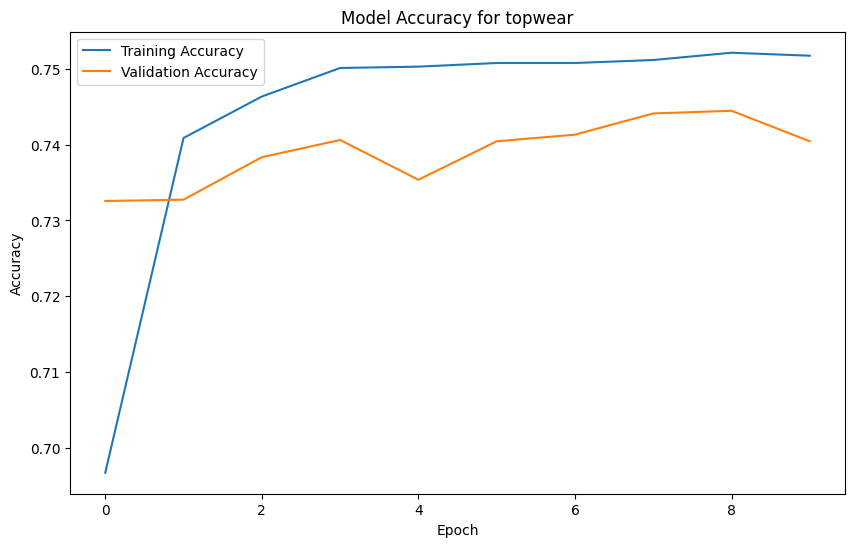

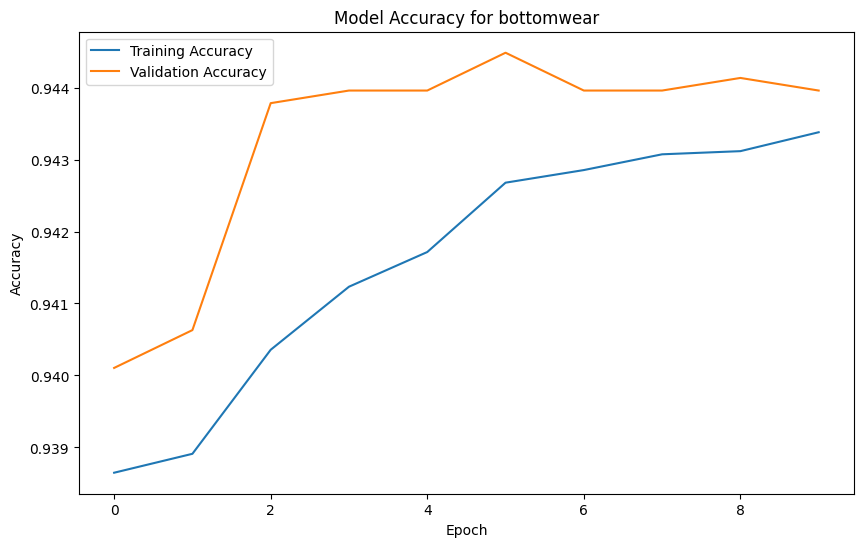

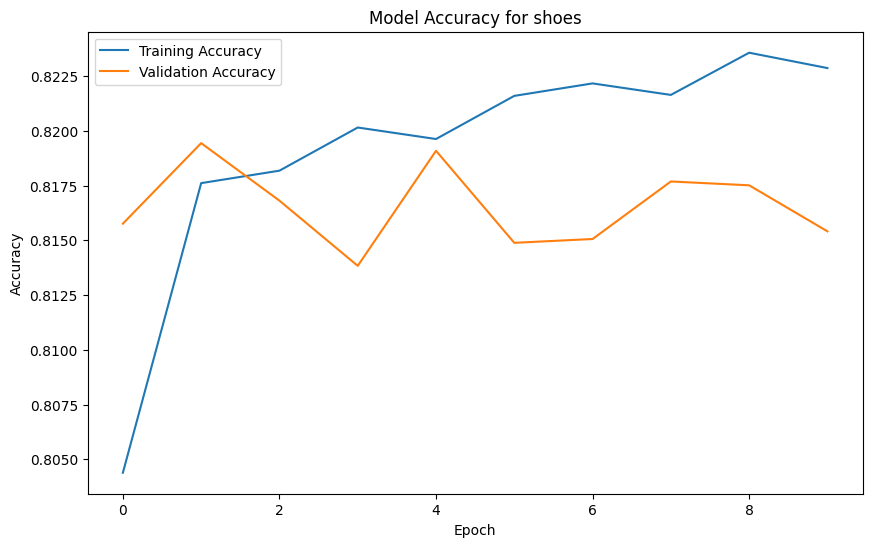

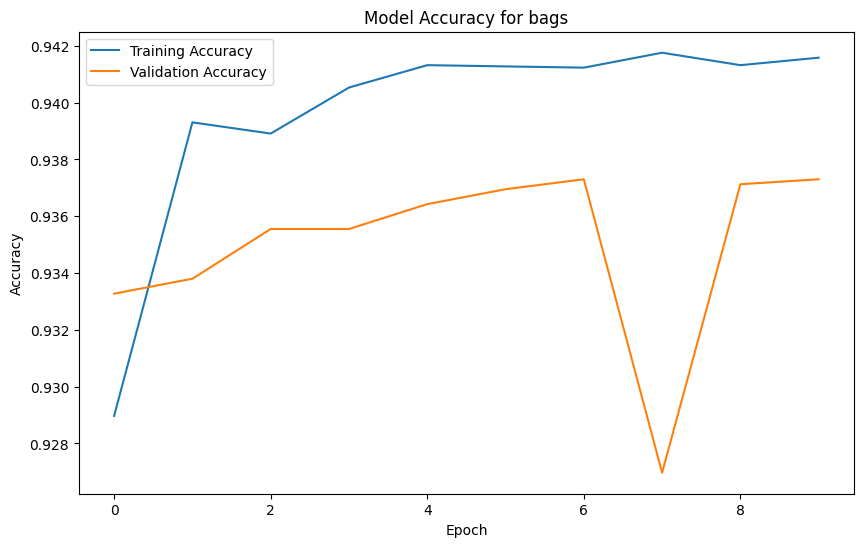

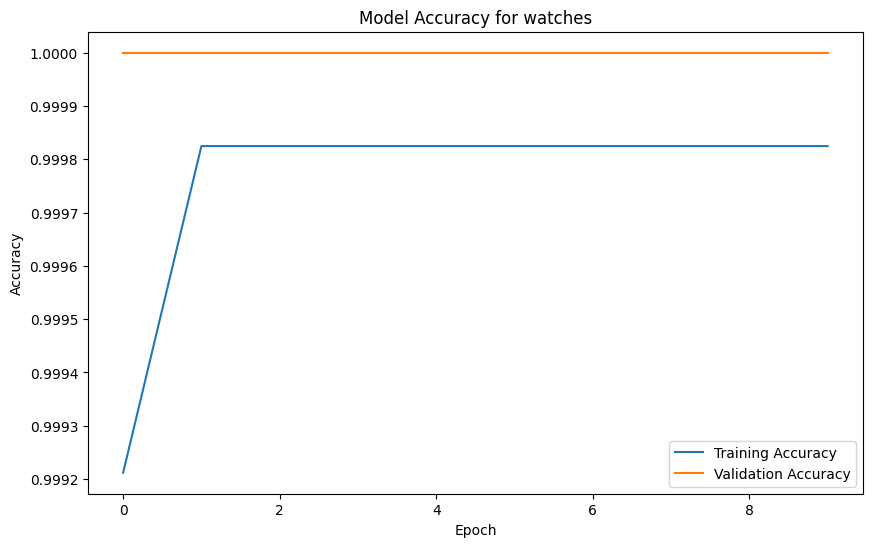

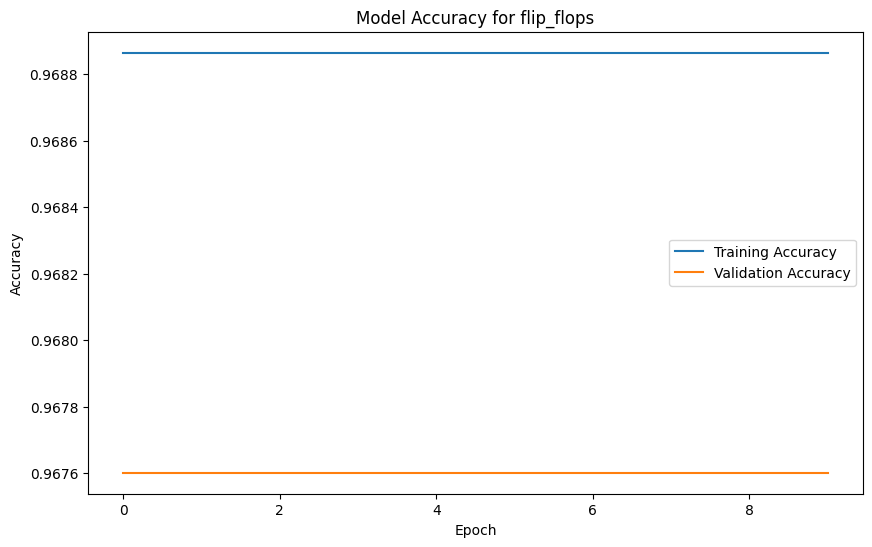

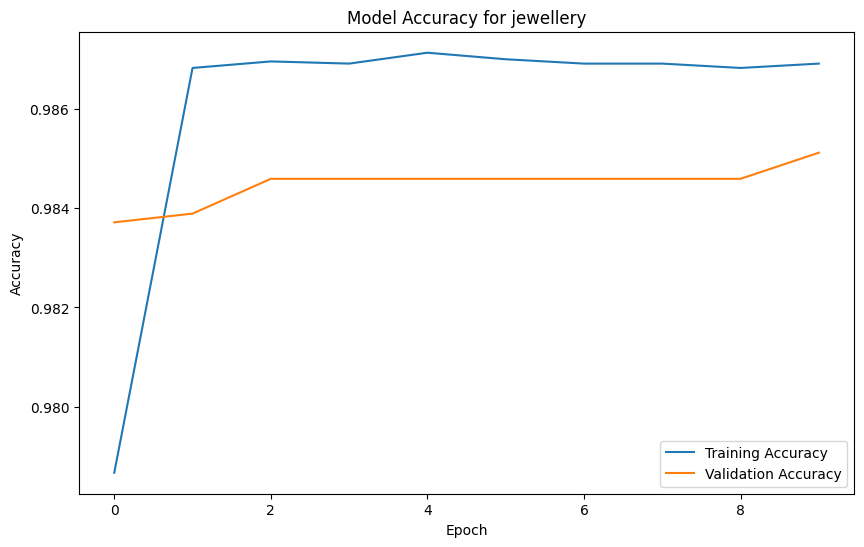

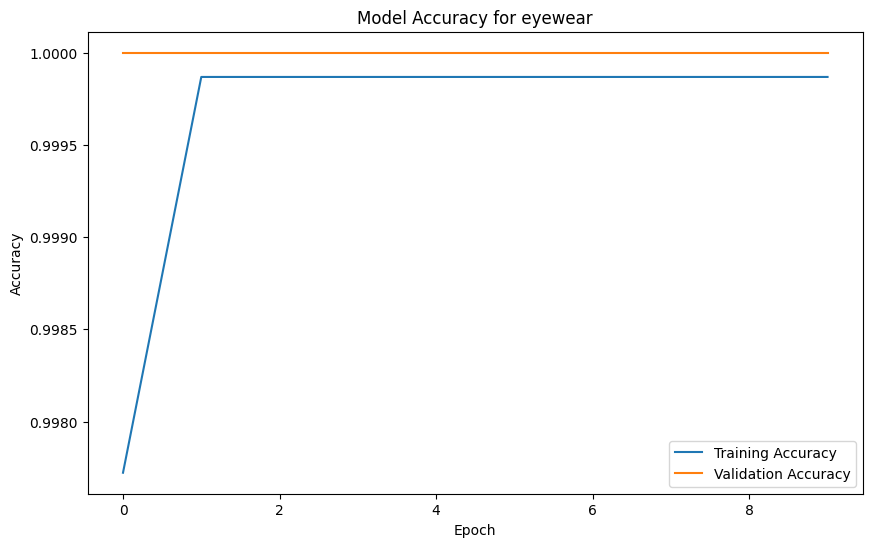

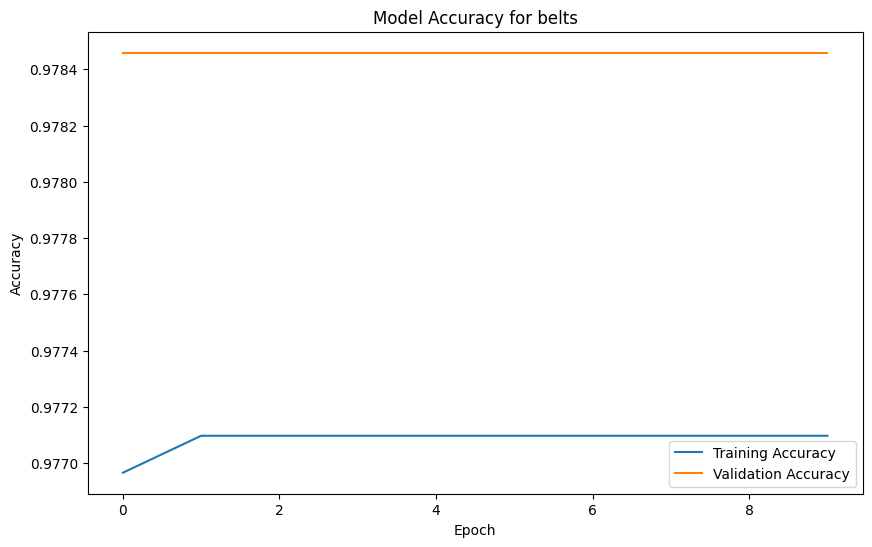

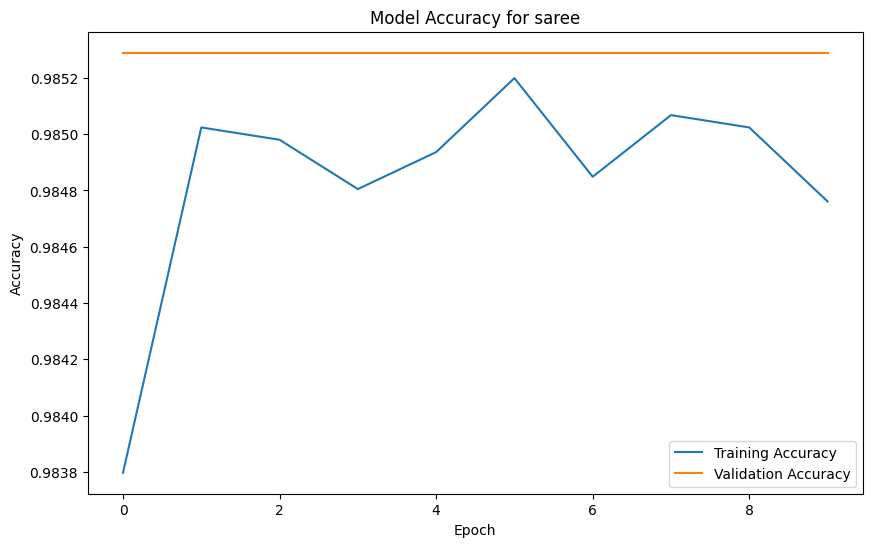

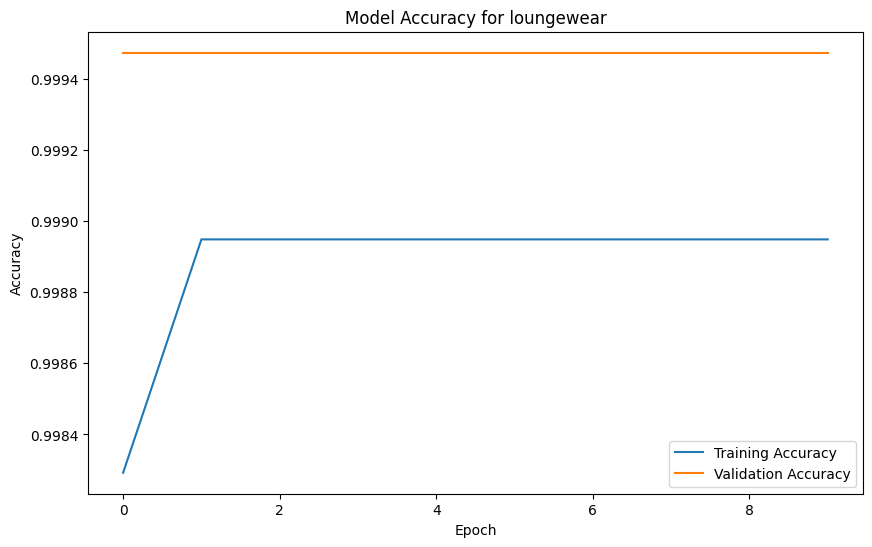

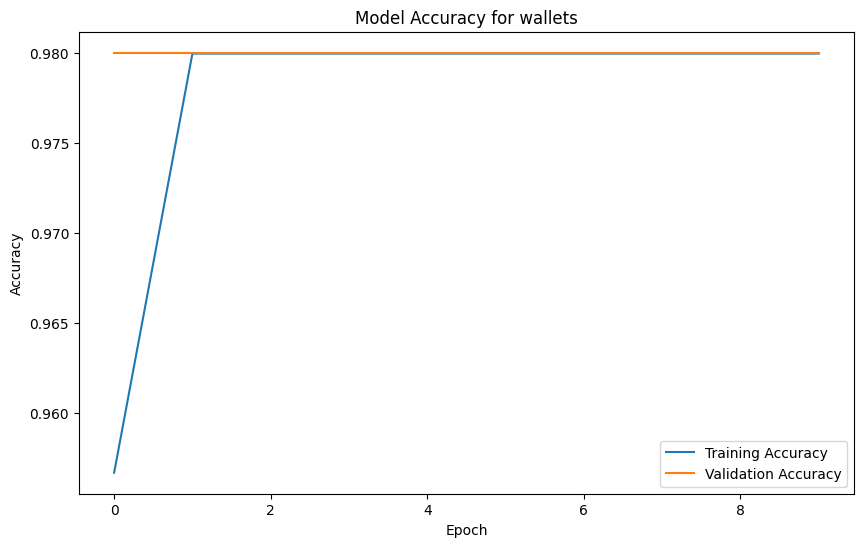

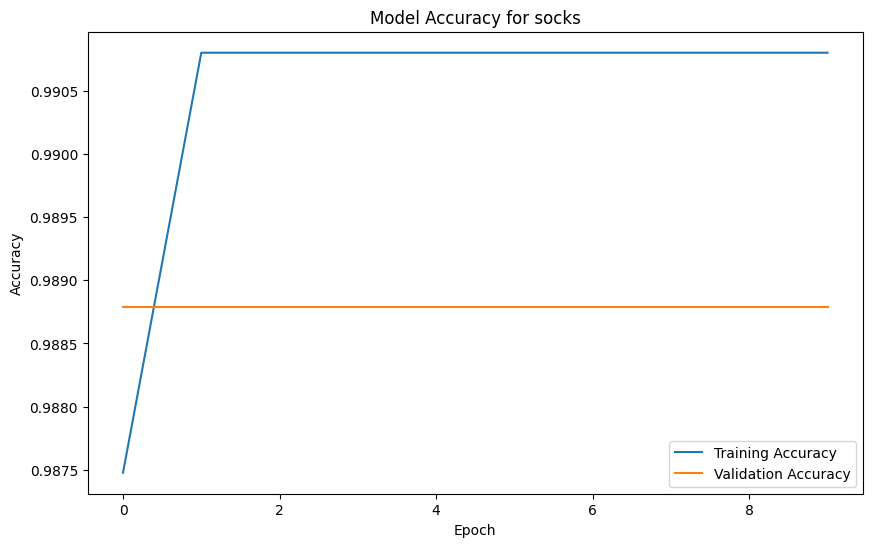

In [114]:
import matplotlib.pyplot as plt

# Access the history object from your model's training process
history = model.history.history

# Plot the training and validation accuracy for each output
for output_name in model.output_names:
  plt.figure(figsize=(10, 6))
  # Changed the key format to match the expected format in history
  plt.plot(history[output_name + '_accuracy'], label='Training Accuracy')
  plt.plot(history['val_' + output_name + '_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy for ' + output_name)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [115]:
df.head()

user_id     id gender masterCategory subCategory   articleType baseColour  \
0    46048  48449    Men        Apparel     Topwear       Tshirts       Blue   
1    28289  12868    Men       Footwear       Shoes  Formal Shoes      Black   
2    23434  17968    Men       Footwear  Flip Flops    Flip Flops      Black   
3    98696   3940  Women        Apparel     Topwear       Tshirts       Pink   
4    81482  46596  Women       Footwear       Shoes         Heels      Brown   

   season    year   usage  ... ratings  \
0  Summer  2012.0  Casual  ...       5   
1  Spring  2012.0  Formal  ...       3   
2    Fall  2011.0  Casual  ...       4   
3  Summer  2011.0  Casual  ...       4   
4  Winter  2012.0  Casual  ...       4   

                                              review      Month  Price (USD)  \
0  Comfortable and stylish, worth the price. and ...     August           39   
1  Satisfactory for the price. for special occasi...     August           24   
2              Exceeded expectations, love the fit!!       July           50   
3  High quality fabric, very satisfied. for speci...  September           24   
4              High quality fabric, very satisfied..        May           24   

  cluster gender_encoded  baseColour_encoded  usage_encoded  \
0       0              2                   2              0   
1       2              2                   1              2   
2       0              2                   1              0   
3       2              4                  31              0   
4       1              4                   4              0   

   Price (USD)_scaled  subCategory_encoded  
0            0.459903                   10  
1           -0.865725                    8  
2            1.432031                    4  
3           -0.865725                   10  
4           -0.865725                    8  

[5 rows x 23 columns]

In [116]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Flip Flops', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Flip Flops', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes','Flip Flops'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

Encoded Complementary Map: {10: [2, 8, 4, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 4, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 8, 4], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [117]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [118]:
import numpy as np

def get_dnn_recommendations(product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map):
    # Find the target product's index and attributes
    try:
        product_index = df[df['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract target product attributes
    encoded_subcategory = df.loc[product_index, 'subCategory_encoded']
    product_gender = df.loc[product_index, 'gender_encoded']
    encoded_colour = df.loc[product_index, 'baseColour_encoded']
    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
    print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

    # Identify complementary subcategories and colors
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])
    print(f"Complementary Subcategories: {complementary_subcategories}")
    print(f"Complementary Colours: {complementary_colours}")


    # Prepare dictionary to store recommended items for each subcategory
    recommendations = {}
    footwear_selected = False  # Track if a footwear item has already been added

    for idx, row in df.iterrows():
        # Skip the target item itself
        if idx == product_index:
            print("Skipping target product itself")
            continue

        # Retrieve the current item’s attributes
        recommended_subcategory = row['subCategory_encoded']
        recommended_master_category = row['masterCategory']
        recommended_colour = row['baseColour_encoded']

        # Check if the item satisfies the criteria for being a complementary item
        if (recommended_subcategory in complementary_subcategories and
            row['gender_encoded'] == product_gender and
            recommended_colour in complementary_colours):

            # Restrict to one footwear item
            if recommended_master_category == 'Footwear':
                if footwear_selected:
                    continue  # Skip if a footwear item is already added
                else:
                    footwear_selected = True  # Mark footwear as selected

            # Prepare input features for DNN prediction
            model_inputs = [
                np.array([row['gender_encoded']]),
                np.array([row['baseColour_encoded']]),
                np.array([row['usage_encoded']]),
                np.array([row['Price (USD)_scaled']])
            ]

            # predict similarity score
            try:
                similarity_score = model.predict(model_inputs)
            except Exception as e:
                print(f"Prediction failed for item {row['id']} with error: {e}")
                continue


            # Add to recommendations if higher probability or first instance in subcategory
            if (recommended_subcategory not in recommendations or
                recommendations[recommended_subcategory][1] < similarity_score):
                recommendations[recommended_subcategory] = (row['id'], similarity_score)

            # Stop if all complementary subcategories are covered
            if len(recommendations) == len(complementary_subcategories):
                break

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    if len(recommended_product_ids) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommended_product_ids


In [ ]:
random_product_ids = [31571, 8506, 58652, 6097, 10762, 13851, 47563, 57847, 12241, 51433]

In [130]:
# Example usage:
product_id = 58652  # Replace with the actual product ID
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)


Product Index: 18055
Encoded Subcategory: 10, Gender: 4, Colour: 1
Subcategory: Topwear
Complementary Subcategories: [2, 8, 4, 5, 3, 1, 0, 12, 11]
Complementary Colours: [42, 13, 0, 36, 9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

In [131]:
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['//content//drive//MyDrive//images//50378.jpg',
 '//content//drive//MyDrive//images//43705.jpg',
 '//content//drive//MyDrive//images//53447.jpg',
 '//content//drive//MyDrive//images//53994.jpg',
 '//content//drive//MyDrive//images//38677.jpg',
 '//content//drive//MyDrive//images//38405.jpg',
 '//content//drive//MyDrive//images//19292.jpg']

In [132]:
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

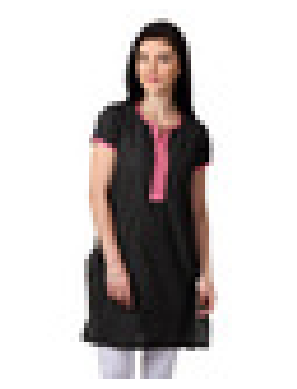

In [133]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [134]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

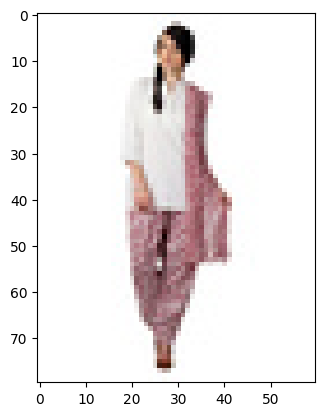

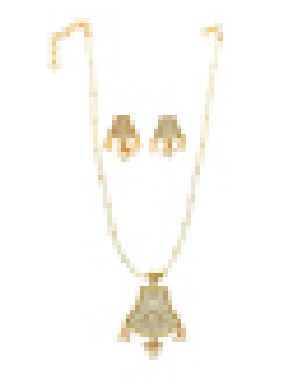

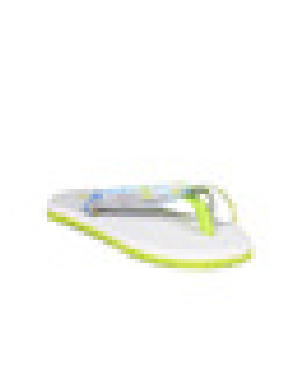

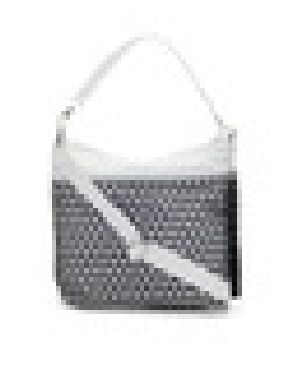

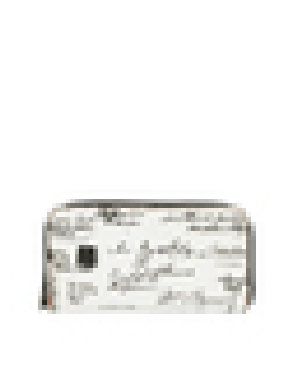

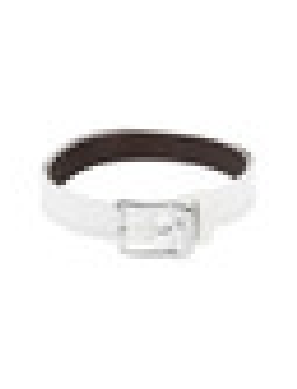

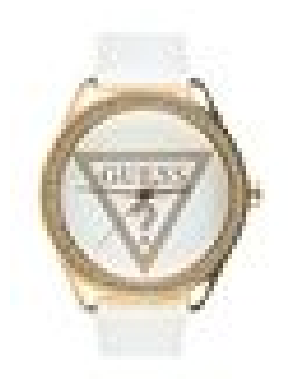

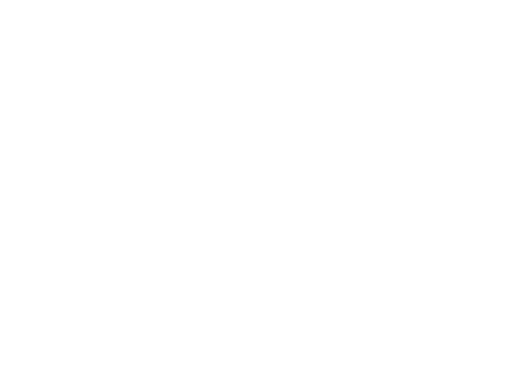

In [135]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

Product Index: 27597
Encoded Subcategory: 2, Gender: 2, Colour: 1
Subcategory: Bottomwear
Complementary Subcategories: [10, 8, 4, 0, 1, 12, 11]
Complementary Colours: [42, 13, 0, 36, 9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━

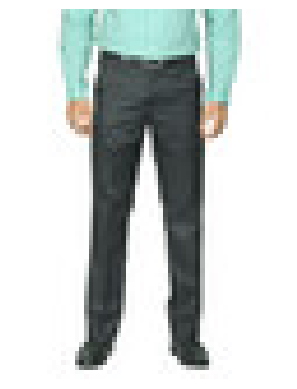

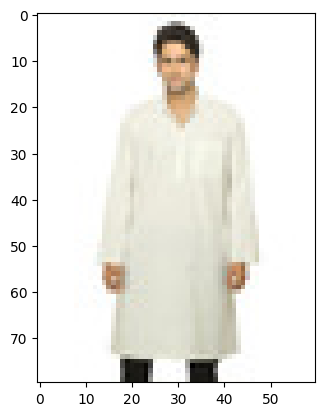

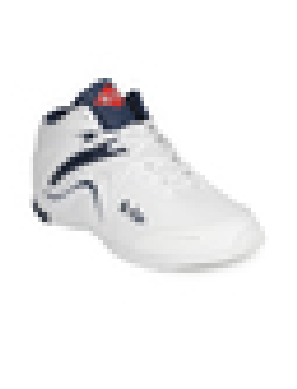

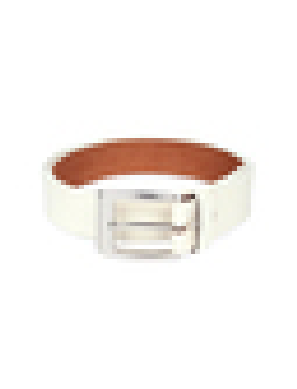

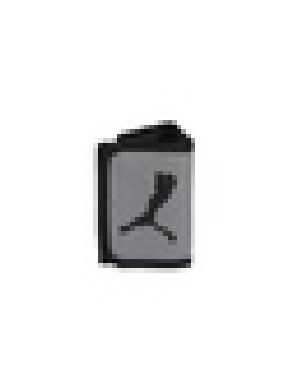

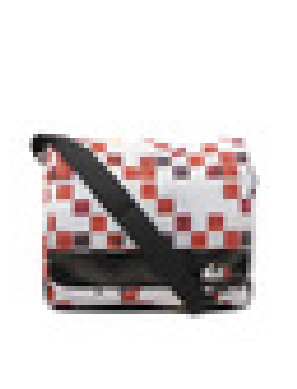

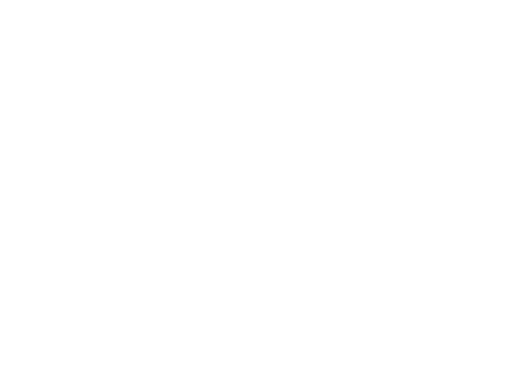

In [137]:
product_id = 31571
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

Product Index: 9615
Encoded Subcategory: 8, Gender: 2, Colour: 1
Subcategory: Shoes
Complementary Subcategories: [10, 2, 4, 9, 3, 1]
Complementary Colours: [42, 13, 0, 36, 9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

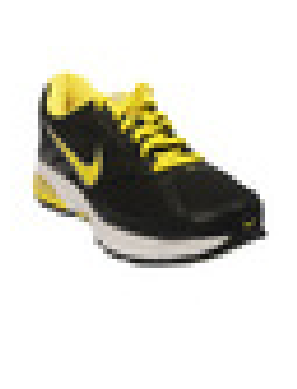

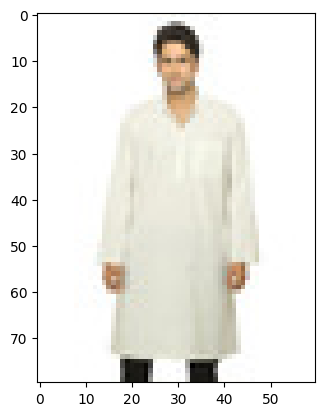

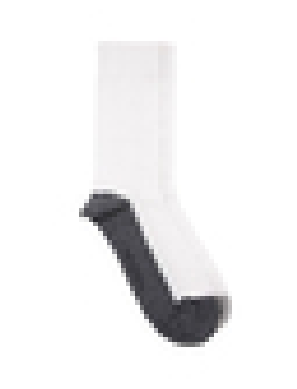

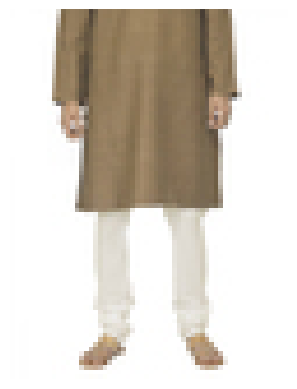

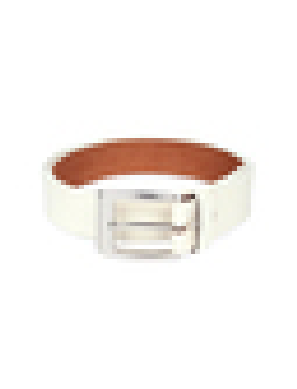

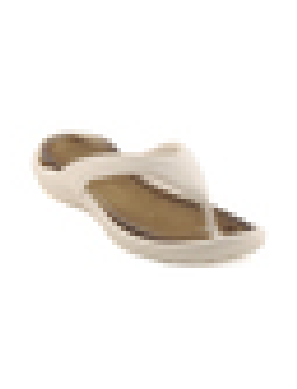

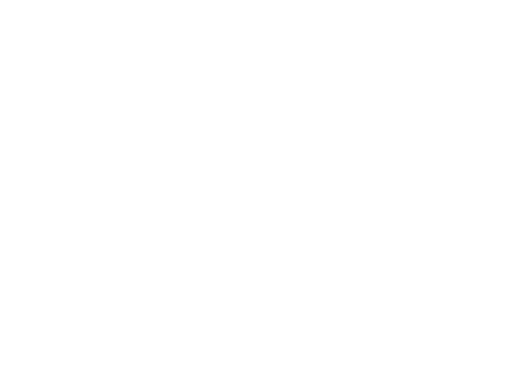

In [138]:
product_id = 8506
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

Product Index: 23121
Encoded Subcategory: 10, Gender: 2, Colour: 12
Subcategory: Topwear
Complementary Subcategories: [2, 8, 4, 5, 3, 1, 0, 12, 11]
Complementary Colours: [42, 1, 25, 43, 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

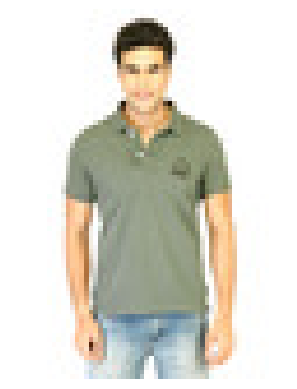

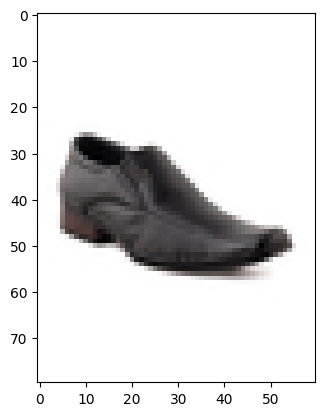

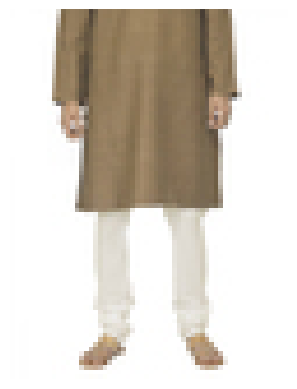

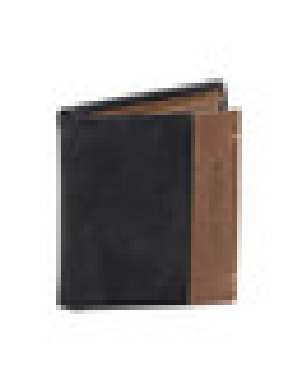

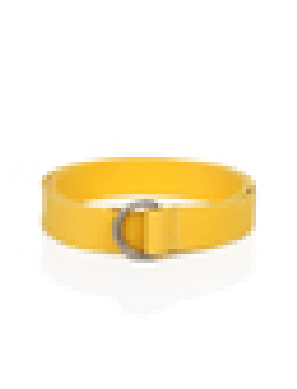

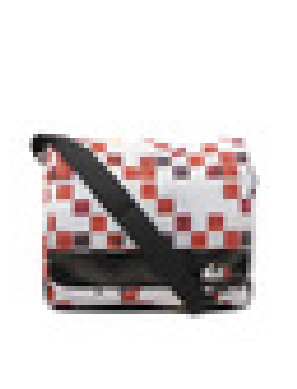

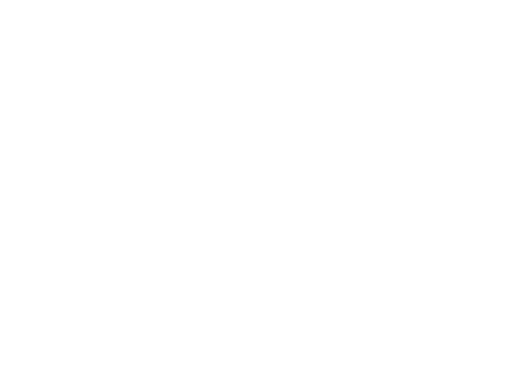

In [139]:
product_id = 6097
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

Product Index: 21964
Encoded Subcategory: 4, Gender: 3, Colour: 43
Subcategory: Flip Flops
Complementary Subcategories: [10, 2, 9, 1, 3]
Complementary Colours: [1, 25, 13, 12, 32]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━

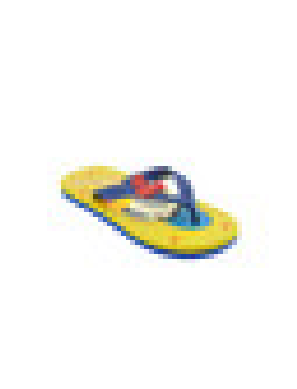

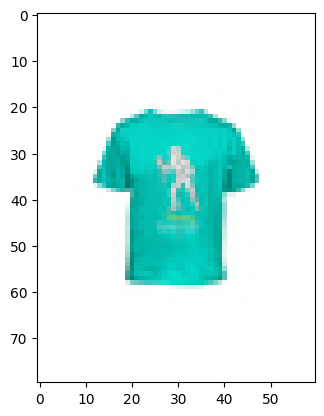

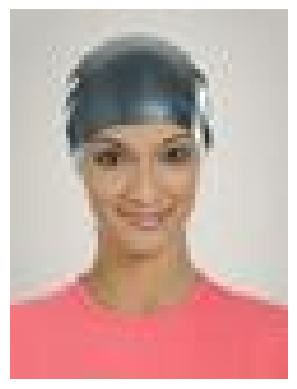

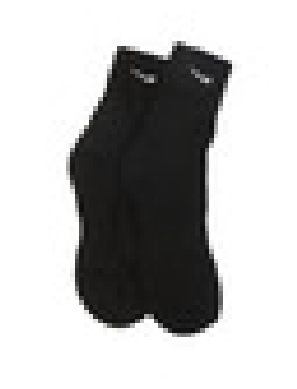

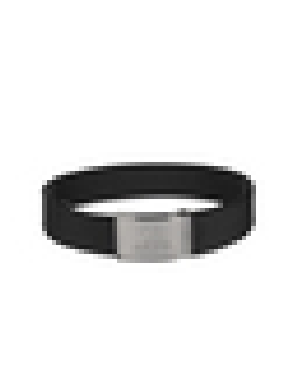

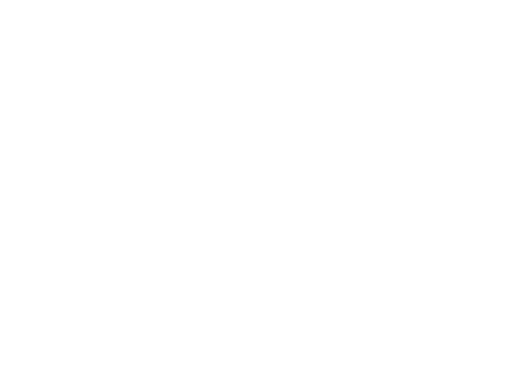

In [140]:
product_id = 10762
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

Product Index: 12331
Encoded Subcategory: 10, Gender: 2, Colour: 2
Subcategory: Topwear
Complementary Subcategories: [2, 8, 4, 5, 3, 1, 0, 12, 11]
Complementary Colours: [42, 9, 43, 31, 36]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Skipping target product itself
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━

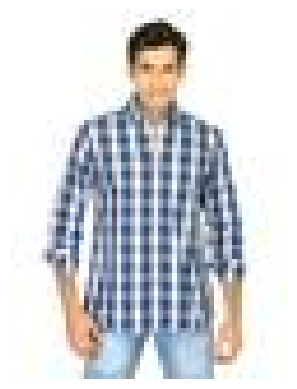

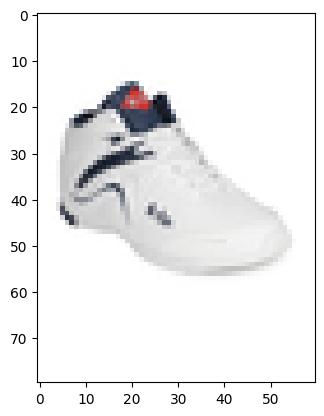

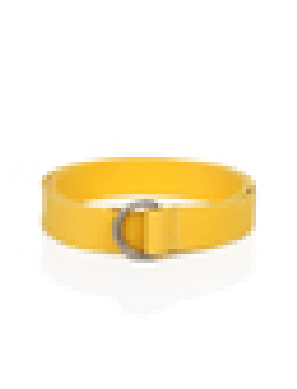

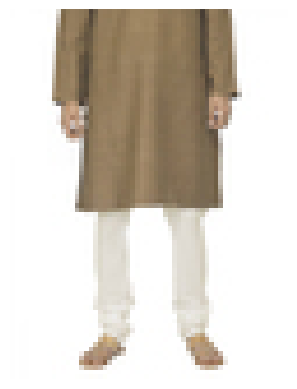

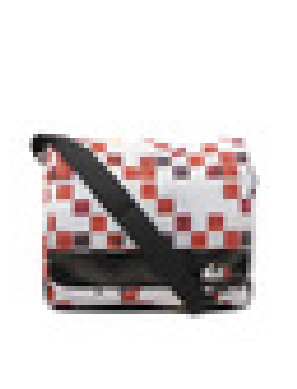

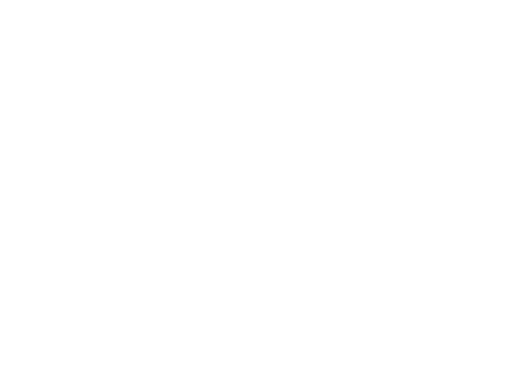

In [141]:
product_id = 13851
recommended_product_ids = get_dnn_recommendations(
    product_id, df, model, encoded_complementary_map, encoded_complementary_colour_map
)

print("Recommended Outfit Product IDs:", recommended_product_ids)
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_product_ids:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")